## 1. Import Libraries

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1.1 Pandas Options

In [2]:
pd.set_option('display.max_columns', 500)

### 1.2 Reset Pandas Options

In [3]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


## 2. Read Dataset

#### Download the dataset

In [ ]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip

##### Attribute Information:

The 54 columns in the data files are organized as follows: 
<br>
1 timestamp (s) 
<br>
2 activityID (see below for the mapping to the activities) 
<br>
3 heart rate (bpm) 
<br>
4-20 IMU hand 
<br>
21-37 IMU chest 
<br>
38-54 IMU ankle 
<br>

The IMU sensory data contains the following columns:
1 temperature (Â°C) 
<br>
2-4 3D-acceleration data (ms-2), scale: Â±16g, resolution: 13-bit 
<br>
5-7 3D-acceleration data (ms-2), scale: Â±6g, resolution: 13-bit 
<br>
8-10 3D-gyroscope data (rad/s) 
<br>
11-13 3D-magnetometer data (Î¼T) 
<br>
14-17 orientation (invalid in this data collection) 
<br>

List of activityIDs and corresponding activities: 
<br>
1 lying
<br>
2 sitting 
<br>
3 standing 
<br>
4 walking 
<br>
5 running 
<br>
6 cycling 
<br>
7 Nordic walking 
<br>
9 watching TV 
<br>
10 computer work 
<br>
11 car driving 
<br>
12 ascending stairs 
<br>
13 descending stairs 
<br>
16 vacuum cleaning 
<br>
17 ironing 
<br>
18 folding laundry 
<br>
19 house cleaning 
<br>
20 playing soccer 
<br>
24 rope jumping 
<br>
0 other (transient activities)

In [54]:
# Load data
list_of_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [3]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
df = dataCollection.copy()
df.head()

timestamp  activityID  heartrate  handTemperature  handAcc16_1  \
0       8.38           0      104.0             30.0      2.37223   
1       8.39           0        NaN             30.0      2.18837   
2       8.40           0        NaN             30.0      2.37357   
3       8.41           0        NaN             30.0      2.07473   
4       8.42           0        NaN             30.0      2.22936   

   handAcc16_2  handAcc16_3  handAcc6_1  handAcc6_2  handAcc6_3  ...  \
0      8.60074      3.51048     2.43954     8.76165     3.35465  ...   
1      8.56560      3.66179     2.39494     8.55081     3.64207  ...   
2      8.60107      3.54898     2.30514     8.53644     3.73280  ...   
3      8.52853      3.66021     2.33528     8.53622     3.73277  ...   
4      8.83122      3.70000     2.23055     8.59741     3.76295  ...   

   ankleGyro2  ankleGyro3  ankleMagne1  ankleMagne2  ankleMagne3  \
0    0.009250   -0.017580     -61.1888     -38.9599     -58.1438   
1   -0.004638    0.000368     -59.8479     -38.8919     -58.5253   
2    0.000148    0.022495     -60.7361     -39.4138     -58.3999   
3   -0.020301    0.011275     -60.4091     -38.7635     -58.3956   
4   -0.014303   -0.002823     -61.5199     -39.3879     -58.2694   

   ankleOrientation1  ankleOrientation2  ankleOrientation3  ankleOrientation4  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                1.0                0.0                0.0                0.0   
3                1.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   subject_id  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 55 columns]

In [12]:
df.shape

(2872533, 55)

In [4]:
','.join(map(str,df.columns))

'timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id'

In [5]:
with open('data/variables.txt', 'w') as f:
    for item in df.columns:
        f.write("%s\n" % item)

In [6]:
#df.to_csv("data/dataset.csv", index=False)

In [21]:
df = pd.read_csv("data/dataset.csv", index_col=False)

### 2.1 Count Missing Values

In [9]:
#!./jobs/missing_value_counts.py -r local data/dataset.csv > outputs/missing_value_counts.txt

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/missing_value_counts.ubuntu.20220426.232253.126712
Running step 1 of 1...
job output is in /tmp/missing_value_counts.ubuntu.20220426.232253.126712/output
Streaming final output from /tmp/missing_value_counts.ubuntu.20220426.232253.126712/output...
Removing temp directory /tmp/missing_value_counts.ubuntu.20220426.232253.126712...


In [10]:
!cat outputs/missing_value_counts.txt

"ankleMagne3"	11749
"ankleOrientation1"	11749
"ankleOrientation2"	11749
"ankleOrientation3"	11749
"handAcc16_1"	13141
"handAcc16_2"	13141
"handAcc16_3"	13141
"handAcc6_1"	13141
"ankleAcc6_1"	11749
"ankleAcc6_2"	11749
"ankleAcc6_3"	11749
"ankleGyro1"	11749
"chestAcc16_3"	3563
"chestAcc6_1"	3563
"chestAcc6_2"	3563
"chestAcc6_3"	3563
"activityID"	0
"ankleAcc16_1"	11749
"ankleAcc16_2"	11749
"ankleAcc16_3"	11749
"chestOrientation3"	3563
"chestOrientation4"	3563
"chestTemperature"	3563
"handOrientation1"	13141
"handOrientation2"	13141
"handOrientation3"	13141
"chestMagne2"	3563
"chestMagne3"	3563
"chestOrientation1"	3563
"chestOrientation2"	3563
"handGyro3"	13141
"handMagne1"	13141
"handMagne2"	13141
"handMagne3"	13141
"ankleOrientation4"	11749
"ankleTemperature"	11749
"chestAcc16_1"	3563
"chestAcc16_2"	3563
"ankleGyro2"	11749
"ankleGyro3"	11749
"ankleMagne1"	11749
"ankleMagne2"	11749
"handAcc6_2"	13141
"handAcc6_3"	13141
"handGyro1"	13141
"handGyro2"	13141
"chestGyro1"	3563
"chestGyro2"	356

### 2.1 Remove Columns

Remove Orientation columns, because they are invalid as dataset author mentioned.
<br>
Remove '0' activity as it contains 'other' type of activity that we do not care.

In [23]:
df = df.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                     'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                     'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                     axis = 1)
df = df.drop(dataCollection[dataCollection.activityID == 0].index)

In [24]:
df

timestamp  activityID  heartrate  handTemperature  handAcc16_1  \
2928         37.66           1        NaN           30.375      2.21530   
2929         37.67           1        NaN           30.375      2.29196   
2930         37.68           1        NaN           30.375      2.29090   
2931         37.69           1        NaN           30.375      2.21800   
2932         37.70           1      100.0           30.375      2.30106   
...            ...         ...        ...              ...          ...   
2872015      95.06          24        NaN           25.125      4.99466   
2872016      95.07          24        NaN           25.125      5.02764   
2872017      95.08          24        NaN           25.125      5.06409   
2872018      95.09          24      162.0           25.125      5.13914   
2872019      95.10          24        NaN           25.125      5.00812   

         handAcc16_2  handAcc16_3  handAcc6_1  handAcc6_2  handAcc6_3  ...  \
2928         8.27915      5.58753     2.24689     8.55387     5.77143  ...   
2929         7.67288      5.74467     2.27373     8.14592     5.78739  ...   
2930         7.14240      5.82342     2.26966     7.66268     5.78846  ...   
2931         7.14365      5.89930     2.22177     7.25535     5.88000  ...   
2932         7.25857      6.09259     2.20720     7.24042     5.95555  ...   
...              ...          ...         ...         ...         ...  ...   
2872015      6.01881      5.59830     4.90787     6.05780     5.68357  ...   
2872016      5.90369      5.48372     4.89090     5.95209     5.56301  ...   
2872017      5.71370      5.48491     4.97981     5.87584     5.45738  ...   
2872018      5.63724      5.48629     4.97690     5.69448     5.29167  ...   
2872019      5.40645      5.02326     4.97362     5.45272     5.14120  ...   

         ankleAcc6_1  ankleAcc6_2  ankleAcc6_3  ankleGyro1  ankleGyro2  \
2928         9.63162     -1.76757     0.265761    0.002908   -0.027714   
2929         9.58649     -1.75247     0.250816    0.020882    0.000945   
2930         9.60196     -1.73721     0.356632   -0.035392   -0.052422   
2931         9.58674     -1.78264     0.311453   -0.032514   -0.018844   
2932         9.64677     -1.75240     0.295902    0.001351   -0.048878   
...              ...          ...          ...         ...         ...   
2872015      9.41274     -2.26922    -1.759580    0.021288   -0.012885   
2872016      9.33733     -2.23908    -1.834950    0.010715    0.003629   
2872017      9.32243     -2.23905    -1.804610   -0.016939   -0.035176   
2872018      9.38220     -2.26938    -1.880500   -0.028069   -0.036457   
2872019      9.41250     -2.23905    -1.820220   -0.013310   -0.030195   

         ankleGyro3  ankleMagne1  ankleMagne2  ankleMagne3  subject_id  
2928       0.001752     -61.1081   -36.863600   -58.369600           1  
2929       0.006007     -60.8916   -36.319700   -58.365600           1  
2930      -0.004882     -60.3407   -35.784200   -58.611900           1  
2931       0.026950     -60.7646   -37.102800   -57.879900           1  
2932      -0.006328     -60.2040   -37.122500   -57.884700           1  
...             ...          ...          ...          ...         ...  
2872015    0.005878     -45.7855    -0.831734    -0.170139           9  
2872016   -0.004235     -46.0331    -0.817288     0.538134           9  
2872017   -0.002309     -45.5140    -1.229410     0.540438           9  
2872018   -0.007076     -45.9093    -0.565555     0.680109           9  
2872019    0.018229     -46.1702    -0.812965    -0.313346           9  

[1942872 rows x 43 columns]

### 2.2 Handling Missing Values

Apply interpolation for hear-rate

In [25]:
df['heartrate'] = df['heartrate'].interpolate()

In [26]:
df.dropna(inplace=True)

In [27]:
df

timestamp  activityID  heartrate  handTemperature  handAcc16_1  \
2932         37.70           1      100.0           30.375      2.30106   
2933         37.71           1      100.0           30.375      2.07165   
2934         37.72           1      100.0           30.375      2.41148   
2935         37.73           1      100.0           30.375      2.32815   
2936         37.74           1      100.0           30.375      2.25096   
...            ...         ...        ...              ...          ...   
2872015      95.06          24      162.0           25.125      4.99466   
2872016      95.07          24      162.0           25.125      5.02764   
2872017      95.08          24      162.0           25.125      5.06409   
2872018      95.09          24      162.0           25.125      5.13914   
2872019      95.10          24      162.0           25.125      5.00812   

         handAcc16_2  handAcc16_3  handAcc6_1  handAcc6_2  handAcc6_3  ...  \
2932         7.25857      6.09259     2.20720     7.24042     5.95555  ...   
2933         7.25965      6.01218     2.19238     7.21038     6.01604  ...   
2934         7.59780      5.93915     2.23988     7.46679     6.03053  ...   
2935         7.63431      5.70686     2.31663     7.64745     6.01495  ...   
2936         7.78598      5.62821     2.28637     7.70801     5.93935  ...   
...              ...          ...         ...         ...         ...  ...   
2872015      6.01881      5.59830     4.90787     6.05780     5.68357  ...   
2872016      5.90369      5.48372     4.89090     5.95209     5.56301  ...   
2872017      5.71370      5.48491     4.97981     5.87584     5.45738  ...   
2872018      5.63724      5.48629     4.97690     5.69448     5.29167  ...   
2872019      5.40645      5.02326     4.97362     5.45272     5.14120  ...   

         ankleAcc6_1  ankleAcc6_2  ankleAcc6_3  ankleGyro1  ankleGyro2  \
2932         9.64677     -1.75240     0.295902    0.001351   -0.048878   
2933         9.60177     -1.75239     0.311276    0.003793   -0.026906   
2934         9.67694     -1.76748     0.326060    0.036814   -0.032277   
2935         9.61685     -1.76749     0.326380   -0.010352   -0.016621   
2936         9.61686     -1.72212     0.326234    0.039346    0.020393   
...              ...          ...          ...         ...         ...   
2872015      9.41274     -2.26922    -1.759580    0.021288   -0.012885   
2872016      9.33733     -2.23908    -1.834950    0.010715    0.003629   
2872017      9.32243     -2.23905    -1.804610   -0.016939   -0.035176   
2872018      9.38220     -2.26938    -1.880500   -0.028069   -0.036457   
2872019      9.41250     -2.23905    -1.820220   -0.013310   -0.030195   

         ankleGyro3  ankleMagne1  ankleMagne2  ankleMagne3  subject_id  
2932      -0.006328     -60.2040   -37.122500   -57.884700           1  
2933       0.004125     -61.3257   -36.974400   -57.750100           1  
2934      -0.006866     -61.5520   -36.963200   -57.995700           1  
2935       0.006548     -61.5738   -36.172400   -59.348700           1  
2936      -0.011880     -61.7741   -37.174400   -58.119900           1  
...             ...          ...          ...          ...         ...  
2872015    0.005878     -45.7855    -0.831734    -0.170139           9  
2872016   -0.004235     -46.0331    -0.817288     0.538134           9  
2872017   -0.002309     -45.5140    -1.229410     0.540438           9  
2872018   -0.007076     -45.9093    -0.565555     0.680109           9  
2872019    0.018229     -46.1702    -0.812965    -0.313346           9  

[1921427 rows x 43 columns]

### 2.3 Clear Duplicates

In [28]:
df.duplicated().sum()

0

In [29]:
#df.to_csv("data/dataset.csv", index=False)

## 3. Exploratory Data Analysis

In [82]:
df = pd.read_csv("data/dataset.csv", index_col=False)

### 3.1 Get Continous and Categoric Features

In [22]:
y = df["activityID"].values

In [23]:
y

array([ 1,  1,  1, ..., 24, 24, 24])

In [24]:
y_df = df["activityID"]

In [25]:
y_df

0           1
1           1
2           1
3           1
4           1
           ..
1921422    24
1921423    24
1921424    24
1921425    24
1921426    24
Name: activityID, Length: 1921427, dtype: int64

In [4]:
numeric_data = df[df.columns.difference(['activityID','subject_id'])]
categorical_data = df[['activityID','subject_id']]

In [46]:
categorical_data

activityID  subject_id
0                 1           1
1                 1           1
2                 1           1
3                 1           1
4                 1           1
...             ...         ...
1921422          24           9
1921423          24           9
1921424          24           9
1921425          24           9
1921426          24           9

[1921427 rows x 2 columns]

In [47]:
numeric_data

ankleAcc16_1  ankleAcc16_2  ankleAcc16_3  ankleAcc6_1  ankleAcc6_2  \
0             9.77578      -1.88582      0.095775      9.64677     -1.75240   
1             9.65780      -1.92147     -0.098161      9.60177     -1.75239   
2             9.65839      -1.80756     -0.098862      9.67694     -1.76748   
3             9.65690      -1.88318     -0.136998      9.61685     -1.76749   
4             9.77727      -1.81020      0.133911      9.61686     -1.72212   
...               ...           ...           ...          ...          ...   
1921422       9.40727      -2.24401     -2.259740      9.41274     -2.26922   
1921423       9.36745      -2.28110     -2.337100      9.33733     -2.23908   
1921424       9.36765      -2.24313     -2.337340      9.32243     -2.23905   
1921425       9.44470      -2.24425     -2.259360      9.38220     -2.26938   
1921426       9.44670      -2.28286     -2.181920      9.41250     -2.23905   

         ankleAcc6_3  ankleGyro1  ankleGyro2  ankleGyro3  ankleMagne1  ...  \
0           0.295902    0.001351   -0.048878   -0.006328     -60.2040  ...   
1           0.311276    0.003793   -0.026906    0.004125     -61.3257  ...   
2           0.326060    0.036814   -0.032277   -0.006866     -61.5520  ...   
3           0.326380   -0.010352   -0.016621    0.006548     -61.5738  ...   
4           0.326234    0.039346    0.020393   -0.011880     -61.7741  ...   
...              ...         ...         ...         ...          ...  ...   
1921422    -1.759580    0.021288   -0.012885    0.005878     -45.7855  ...   
1921423    -1.834950    0.010715    0.003629   -0.004235     -46.0331  ...   
1921424    -1.804610   -0.016939   -0.035176   -0.002309     -45.5140  ...   
1921425    -1.880500   -0.028069   -0.036457   -0.007076     -45.9093  ...   
1921426    -1.820220   -0.013310   -0.030195    0.018229     -46.1702  ...   

         handAcc6_3  handGyro1  handGyro2  handGyro3  handMagne1  handMagne2  \
0           5.95555  -0.069961  -0.018328   0.004582     9.15626    -67.1825   
1           6.01604   0.063895   0.007175   0.024701     8.60505    -66.7184   
2           6.03053   0.190837   0.003116   0.038762     9.16003    -66.8578   
3           6.01495   0.200328  -0.009266   0.068567     9.47898    -67.3025   
4           5.93935   0.204098  -0.068256   0.050000     9.15218    -67.0705   
...             ...        ...        ...        ...         ...         ...   
1921422     5.68357  -0.289166  -0.110170   0.238570    -4.79353    -18.1271   
1921423     5.56301  -0.275411  -0.128358   0.267409    -4.54101    -18.0169   
1921424     5.45738  -0.289885  -0.126548   0.281483    -4.17401    -17.9121   
1921425     5.29167  -0.234417  -0.101485   0.275497    -4.66091    -18.2588   
1921426     5.14120  -0.260924  -0.093849   0.266205    -5.05008    -17.6169   

         handMagne3  handTemperature  heartrate  timestamp  
0          -20.0857           30.375      100.0      37.70  
1          -19.8429           30.375      100.0      37.71  
2          -19.9665           30.375      100.0      37.72  
3          -20.6693           30.375      100.0      37.73  
4          -20.3159           30.375      100.0      37.74  
...             ...              ...        ...        ...  
1921422    -48.2695           25.125      162.0      95.06  
1921423    -48.9268           25.125      162.0      95.07  
1921424    -48.4032           25.125      162.0      95.08  
1921425    -49.0563           25.125      162.0      95.09  
1921426    -48.1408           25.125      162.0      95.10  

[1921427 rows x 41 columns]

In [54]:
",".join(map(str,list(categorical_data.columns)))

'activityID,subject_id'

In [49]:
",".join(map(str,list(numeric_data.columns)))

'ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handTemperature,heartrate,timestamp'

In [50]:
# numeric_data.to_csv("data/numeric_data.csv", index=False)
# categorical_data.to_csv("data/categorical_data.csv", index=False)

In [2]:
numeric_data = pd.read_csv("data/numeric_data.csv", index_col=False)
categorical_data = pd.read_csv("data/categorical_data.csv", index_col=False)

### 3.2 Descriptive Statistics (Continuous Features) MapReduce Jobs

![images/descriptives_mr.png](images/descriptives_mr.png)

### 3.2.1 Mean MRJob

In [62]:
#!./jobs/mean.py -r local data/numeric_data.csv > outputs/mean.csv

In [56]:
mean_dict = {}
file = open("outputs/mean.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    mean_dict[key] = float(value)
    
mean_dict

{'ankleMagne1': -31.533602673788728,
 'ankleMagne2': 1.3836879492138858,
 'ankleMagne3': 17.241675143178007,
 'handAcc16_2': 3.581012480104515,
 'handAcc16_3': 3.614215101812092,
 'handAcc6_1': -4.865630388343633,
 'ankleAcc6_1': 9.356581321093682,
 'ankleAcc6_2': -0.06848440225100902,
 'ankleAcc6_3': -2.1738048483331864,
 'chestAcc16_3': -1.4438831070057254,
 'chestAcc6_1': 0.1967097629045028,
 'chestAcc6_2': 8.143604399025058,
 'ankleAcc16_1': 9.385042717579047,
 'ankleAcc16_2': -0.17613985684475134,
 'ankleAcc16_3': -2.592587488414641,
 'chestMagne3': 4.553962175329552,
 'chestTemperature': 36.18118701621243,
 'handAcc16_1': -4.9330597123332804,
 'handMagne2': -13.96502904660338,
 'handMagne3': -24.437804133336105,
 'handTemperature': 32.7611219096536,
 'chestGyro3': -0.023392890529778082,
 'chestMagne1': 4.5101942397922095,
 'chestMagne2': -30.58752924023132,
 'handGyro2': 0.03962897790687231,
 'handGyro3': -0.0032233459529291686,
 'handMagne1': 21.029050115372208,
 'ankleTemperatu

### 3.2.2 Median MRJob

In [76]:
#!./jobs/median.py -r local data/numeric_data.csv > outputs/median.csv

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/median.ubuntu.20220427.001226.970167
Running step 1 of 1...
job output is in /tmp/median.ubuntu.20220427.001226.970167/output
Streaming final output from /tmp/median.ubuntu.20220427.001226.970167/output...
Removing temp directory /tmp/median.ubuntu.20220427.001226.970167...


In [77]:
median_dict = {}
file = open("outputs/median.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    median_dict[key] = float(value)
    
median_dict

{'ankleMagne1': -33.9324,
 'ankleMagne2': 0.7721359999999999,
 'ankleMagne3': 18.7501,
 'handAcc16_2': 3.5249099999999998,
 'handAcc16_3': 3.44425,
 'handAcc6_1': -5.34657,
 'ankleAcc6_1': 9.548689999999999,
 'ankleAcc6_2': -0.22687600000000002,
 'ankleAcc6_3': -1.9887400000000002,
 'chestAcc16_3': -1.4653100000000001,
 'chestAcc6_1': 0.309166,
 'chestAcc6_2': 9.13799,
 'ankleAcc16_1': 9.53595,
 'ankleAcc16_2': -0.296078,
 'ankleAcc16_3': -2.41742,
 'chestMagne3': 2.94305,
 'chestTemperature': 36.4375,
 'handAcc16_1': -5.421069999999999,
 'handMagne2': -16.0993,
 'handMagne3': -23.9643,
 'handTemperature': 33.1875,
 'chestGyro3': -0.0169788,
 'chestMagne1': 2.75025,
 'chestMagne2': -33.3734,
 'handGyro2': 0.00591161,
 'handGyro3': -0.00560351,
 'handMagne1': 22.8201,
 'ankleTemperature': 34.0625,
 'chestAcc16_1': 0.44018999999999997,
 'chestAcc16_2': 9.19876,
 'ankleGyro1': 0.00458411,
 'ankleGyro2': -0.00382093,
 'ankleGyro3': -0.00225002,
 'handAcc6_2': 3.56494,
 'handAcc6_3': 3.6782

### 3.2.3 Min-Max MRJob

In [78]:
#!./jobs/max.py -r local data/numeric_data.csv > outputs/max.csv

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/max.ubuntu.20220427.001619.457891
Running step 1 of 1...
job output is in /tmp/max.ubuntu.20220427.001619.457891/output
Streaming final output from /tmp/max.ubuntu.20220427.001619.457891/output...
Removing temp directory /tmp/max.ubuntu.20220427.001619.457891...


In [79]:
#!./jobs/min.py -r local data/numeric_data.csv > outputs/min.csv

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/min.ubuntu.20220427.002007.872504
Running step 1 of 1...
job output is in /tmp/min.ubuntu.20220427.002007.872504/output
Streaming final output from /tmp/min.ubuntu.20220427.002007.872504/output...
Removing temp directory /tmp/min.ubuntu.20220427.002007.872504...


In [80]:
max_dict = {}
file = open("outputs/max.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    max_dict[key] = float(value)
    
max_dict

{'ankleMagne1': 91.5516,
 'ankleMagne2': 94.2478,
 'ankleMagne3': 146.9,
 'handAcc16_2': 155.69899999999996,
 'handAcc16_3': 157.76,
 'handAcc6_1': 52.8214,
 'ankleAcc6_1': 61.9693,
 'ankleAcc6_2': 62.049,
 'ankleAcc6_3': 60.9357,
 'chestAcc16_3': 44.0693,
 'chestAcc6_1': 25.7361,
 'chestAcc6_2': 61.9373,
 'ankleAcc16_1': 157.232,
 'ankleAcc16_2': 156.19,
 'ankleAcc16_3': 158.872,
 'chestMagne3': 96.3585,
 'chestTemperature': 38.5625,
 'handAcc16_1': 62.8596,
 'handMagne2': 109.48700000000001,
 'handMagne3': 101.758,
 'handTemperature': 35.5,
 'chestGyro3': 3.0525900000000004,
 'chestMagne1': 80.4739,
 'chestMagne2': 40.2589,
 'handGyro2': 23.0779,
 'handGyro3': 14.3384,
 'handMagne1': 137.54399999999998,
 'ankleTemperature': 35.4375,
 'chestAcc16_1': 27.5223,
 'chestAcc16_2': 153.582,
 'ankleGyro1': 16.4427,
 'ankleGyro2': 13.5882,
 'ankleGyro3': 16.5288,
 'handAcc6_2': 62.2598,
 'handAcc6_3': 61.9234,
 'handGyro1': 26.4158,
 'chestAcc6_3': 36.9676,
 'chestGyro1': 18.5159,
 'chestGyro

In [81]:
min_dict = {}
file = open("outputs/min.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    min_dict[key] = float(value)
    
min_dict

{'ankleMagne1': -172.865,
 'ankleMagne2': -137.908,
 'ankleMagne3': -102.71600000000001,
 'handAcc16_2': -104.301,
 'handAcc16_3': -101.45200000000001,
 'handAcc6_1': -61.2147,
 'ankleAcc6_1': -60.3067,
 'ankleAcc6_2': -61.9064,
 'ankleAcc6_3': -62.3148,
 'chestAcc16_3': -80.1668,
 'chestAcc6_1': -34.204,
 'chestAcc6_2': -48.2572,
 'ankleAcc16_1': -146.851,
 'ankleAcc16_2': -157.44299999999996,
 'ankleAcc16_3': -158.92600000000004,
 'chestMagne3': -66.6847,
 'chestTemperature': 31.9375,
 'handAcc16_1': -145.36700000000005,
 'handMagne2': -200.043,
 'handMagne3': -164.937,
 'handTemperature': 24.875,
 'chestGyro3': -4.4042,
 'chestMagne1': -70.0627,
 'chestMagne2': -122.48,
 'handGyro2': -17.8495,
 'handGyro3': -14.2647,
 'handMagne1': -103.941,
 'ankleTemperature': 30.0,
 'chestAcc16_1': -39.2034,
 'chestAcc16_2': -46.9246,
 'ankleGyro1': -23.995,
 'ankleGyro2': -18.1269,
 'ankleGyro3': -14.0196,
 'handAcc6_2': -61.8417,
 'handAcc6_3': -61.9347,
 'handGyro1': -28.1354,
 'chestAcc6_3': 

### 3.2.4 Standard Deviation MRJob

In [82]:
#!./jobs/std.py -r local data/numeric_data.csv > outputs/std.csv

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/std.ubuntu.20220427.002357.646781
Running step 1 of 1...
job output is in /tmp/std.ubuntu.20220427.002357.646781/output
Streaming final output from /tmp/std.ubuntu.20220427.002357.646781/output...
Removing temp directory /tmp/std.ubuntu.20220427.002357.646781...


In [83]:
std_dict = {}
file = open("outputs/std.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    std_dict[key] = float(value)
    
std_dict

{'ankleMagne1': 18.378596942383364,
 'ankleMagne2': 21.68102679366648,
 'ankleMagne3': 19.751114499740105,
 'handAcc16_2': 6.87680947999516,
 'handAcc16_3': 3.9580978010881136,
 'handAcc6_1': 6.236826470628802,
 'ankleAcc6_1': 6.049126004511477,
 'ankleAcc6_2': 7.144778374806229,
 'ankleAcc6_3': 3.4605928483213355,
 'chestAcc16_3': 4.773004752146079,
 'chestAcc6_1': 1.7365649327238148,
 'chestAcc6_2': 4.8365296752168305,
 'ankleAcc16_1': 6.4971394874671065,
 'ankleAcc16_2': 7.689381827940265,
 'ankleAcc16_3': 3.9101204482847614,
 'chestMagne3': 21.617556290157577,
 'chestTemperature': 1.4930141877883825,
 'handAcc16_1': 6.231436862872525,
 'handMagne2': 24.229369990082734,
 'handMagne3': 20.11206564395977,
 'handTemperature': 1.790632835414766,
 'chestGyro3': 0.3160418849537268,
 'chestMagne1': 17.062819474936962,
 'chestMagne2': 17.56555701865872,
 'handGyro2': 0.9518237797263644,
 'handGyro3': 1.5920126083546084,
 'handMagne1': 23.813507228877345,
 'ankleTemperature': 1.0922765173011

### 3.2.5 Variance MRJob

In [84]:
#!./jobs/variance.py -r local data/numeric_data.csv > outputs/variance.csv

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/variance.ubuntu.20220427.002740.924531
Running step 1 of 1...
job output is in /tmp/variance.ubuntu.20220427.002740.924531/output
Streaming final output from /tmp/variance.ubuntu.20220427.002740.924531/output...
Removing temp directory /tmp/variance.ubuntu.20220427.002740.924531...


In [85]:
variance_dict = {}
file = open("outputs/variance.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    variance_dict[key] = float(value)
    
variance_dict

{'ankleMagne1': 337.7728255705831,
 'ankleMagne2': 470.0669228276838,
 'ankleMagne3': 390.10652398184385,
 'handAcc16_2': 47.2905086241513,
 'handAcc16_3': 15.66653820297856,
 'handAcc6_1': 38.89800442473612,
 'ankleAcc6_1': 36.59192541845698,
 'ankleAcc6_2': 51.04785802509875,
 'ankleAcc6_3': 11.975702861852774,
 'chestAcc16_3': 22.781574364009053,
 'chestAcc6_1': 3.015657765566068,
 'chestAcc6_2': 23.392019299253022,
 'ankleAcc16_1': 42.21282151960433,
 'ankleAcc16_2': 59.12659289585797,
 'ankleAcc16_3': 15.289041920094624,
 'chestMagne3': 467.31873995813146,
 'chestTemperature': 2.2290913649374033,
 'handAcc16_1': 38.83080537596658,
 'handMagne2': 587.0623701163217,
 'handMagne3': 404.49518446694697,
 'handTemperature': 3.206365951265525,
 'chestGyro3': 0.09988247304510471,
 'chestMagne1': 291.13980843428806,
 'chestMagne2': 308.5487933757506,
 'handGyro2': 0.9059685076525827,
 'handGyro3': 2.534504145160044,
 'handMagne1': 567.0831265397935,
 'ankleTemperature': 1.1930679902475276,

### 3.2.6 Skewness MRJob

In [86]:
#!./jobs/skewness.py -r local data/numeric_data.csv > outputs/skewness.csv

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/skewness.ubuntu.20220427.003130.114045
Running step 1 of 1...
job output is in /tmp/skewness.ubuntu.20220427.003130.114045/output
Streaming final output from /tmp/skewness.ubuntu.20220427.003130.114045/output...
Removing temp directory /tmp/skewness.ubuntu.20220427.003130.114045...


In [87]:
skewness_dict = {}
file = open("outputs/skewness.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    skewness_dict[key] = float(value)
    
skewness_dict

{'ankleMagne1': -0.44247613249068307,
 'ankleMagne2': -0.30752586369493995,
 'ankleMagne3': -0.3451662871791614,
 'handAcc16_2': 2.4463558470355515,
 'handAcc16_3': -0.700979324673088,
 'handAcc6_1': -0.4150125509693427,
 'ankleAcc6_1': 0.9190542733326171,
 'ankleAcc6_2': 0.5475992957582406,
 'ankleAcc6_3': -1.143929119205147,
 'chestAcc16_3': 0.3551446349470582,
 'chestAcc6_1': 0.28671133946682137,
 'chestAcc6_2': 1.1235647360261063,
 'ankleAcc16_1': 2.8469174536988757,
 'ankleAcc16_2': 0.22884861285626482,
 'ankleAcc16_3': -1.4162312264018606,
 'chestMagne3': 0.11973176510352865,
 'chestTemperature': -0.5686084440452224,
 'handAcc16_1': -0.4902012804817679,
 'handMagne2': -0.1648505144754001,
 'handMagne3': 0.0068106595079287175,
 'handTemperature': -0.970751135098657,
 'chestGyro3': -0.04516082130990906,
 'chestMagne1': 0.2711818506113531,
 'chestMagne2': 0.6813281645814332,
 'handGyro2': 0.6057558732966468,
 'handGyro3': -0.18467225436484766,
 'handMagne1': -0.29732615337017454,
 '

### 3.2.7 Pearson Kurtosis MRJob

In [88]:
#!./jobs/kurtosis.py -r local data/numeric_data.csv > outputs/kurtosis.csv

Using configs in /etc/mrjob.conf
No configs specified for local runner
Creating temp directory /tmp/kurtosis.ubuntu.20220427.003524.544741
Running step 1 of 1...
job output is in /tmp/kurtosis.ubuntu.20220427.003524.544741/output
Streaming final output from /tmp/kurtosis.ubuntu.20220427.003524.544741/output...
Removing temp directory /tmp/kurtosis.ubuntu.20220427.003524.544741...


In [89]:
kurtosis_dict = {}
file = open("outputs/kurtosis.csv")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    kurtosis_dict[key] = float(value)
    
kurtosis_dict

{'ankleMagne1': 4.727838172046072,
 'ankleMagne2': 3.096984369912563,
 'ankleMagne3': 3.6706812326066904,
 'handAcc16_2': 47.093724413353925,
 'handAcc16_3': 13.314454520215666,
 'handAcc6_1': 6.695108968074241,
 'ankleAcc6_1': 11.092973775872613,
 'ankleAcc6_2': 16.775187576767,
 'ankleAcc6_3': 26.52494740730395,
 'chestAcc16_3': 4.68079939022511,
 'chestAcc6_1': 9.58593871899247,
 'chestAcc6_2': 12.967629132403504,
 'ankleAcc16_1': 50.97598211985472,
 'ankleAcc16_2': 40.97693566896033,
 'ankleAcc16_3': 109.55394024629551,
 'chestMagne3': 2.920916705654349,
 'chestTemperature': 2.576309454315541,
 'handAcc16_1': 8.233757170553126,
 'handMagne2': 4.215523975418162,
 'handMagne3': 3.7020148763963343,
 'handTemperature': 3.7565284514207082,
 'chestGyro3': 9.26982385585538,
 'chestMagne1': 3.1262397613373083,
 'chestMagne2': 3.833703208357949,
 'handGyro2': 13.464901419950344,
 'handGyro3': 8.949622944734205,
 'handMagne1': 2.9688604687278177,
 'ankleTemperature': 3.202535314486441,
 'che

### 3.3 Merge Descriptive Statistics (Continuous Features) Output Files

In [90]:
from collections import defaultdict

descriptives_cont = defaultdict(list)

for d in (mean_dict, median_dict, max_dict, min_dict, std_dict, variance_dict, skewness_dict, kurtosis_dict): # you can list as many input dicts as you want here
    for key, value in d.items():
        descriptives_cont[key].append(value)

In [91]:
descriptives_cont_df = pd.DataFrame.from_dict(descriptives_cont,orient='index', columns = ["Mean", "Median", "Maximum", "Minimum", "Standard Deviation", "Variance", "Skewness", "Kurtosis"])
descriptives_cont_df

Mean       Median     Maximum    Minimum  \
ankleMagne1        -31.533603   -33.932400    91.55160 -172.86500   
ankleMagne2          1.383688     0.772136    94.24780 -137.90800   
ankleMagne3         17.241675    18.750100   146.90000 -102.71600   
handAcc16_2          3.581012     3.524910   155.69900 -104.30100   
handAcc16_3          3.614215     3.444250   157.76000 -101.45200   
handAcc6_1          -4.865630    -5.346570    52.82140  -61.21470   
ankleAcc6_1          9.356581     9.548690    61.96930  -60.30670   
ankleAcc6_2         -0.068484    -0.226876    62.04900  -61.90640   
ankleAcc6_3         -2.173805    -1.988740    60.93570  -62.31480   
chestAcc16_3        -1.443883    -1.465310    44.06930  -80.16680   
chestAcc6_1          0.196710     0.309166    25.73610  -34.20400   
chestAcc6_2          8.143604     9.137990    61.93730  -48.25720   
ankleAcc16_1         9.385043     9.535950   157.23200 -146.85100   
ankleAcc16_2        -0.176140    -0.296078   156.19000 -157.44300   
ankleAcc16_3        -2.592587    -2.417420   158.87200 -158.92600   
chestMagne3          4.553962     2.943050    96.35850  -66.68470   
chestTemperature    36.181187    36.437500    38.56250   31.93750   
handAcc16_1         -4.933060    -5.421070    62.85960 -145.36700   
handMagne2         -13.965029   -16.099300   109.48700 -200.04300   
handMagne3         -24.437804   -23.964300   101.75800 -164.93700   
handTemperature     32.761122    33.187500    35.50000   24.87500   
chestGyro3          -0.023393    -0.016979     3.05259   -4.40420   
chestMagne1          4.510194     2.750250    80.47390  -70.06270   
chestMagne2        -30.587529   -33.373400    40.25890 -122.48000   
handGyro2            0.039629     0.005912    23.07790  -17.84950   
handGyro3           -0.003223    -0.005604    14.33840  -14.26470   
handMagne1          21.029050    22.820100   137.54400 -103.94100   
ankleTemperature    33.714587    34.062500    35.43750   30.00000   
chestAcc16_1         0.330850     0.440190    27.52230  -39.20340   
chestAcc16_2         8.148320     9.198760   153.58200  -46.92460   
ankleGyro1           0.008082     0.004584    16.44270  -23.99500   
ankleGyro2          -0.033994    -0.003821    13.58820  -18.12690   
ankleGyro3           0.001527    -0.002250    16.52880  -14.01960   
handAcc6_2           3.569798     3.564940    62.25980  -61.84170   
handAcc6_3           3.799027     3.678230    61.92340  -61.93470   
handGyro1            0.000974    -0.006034    26.41580  -28.13540   
chestAcc6_3         -1.114232    -1.108260    36.96760  -61.80410   
chestGyro1           0.005524     0.002629    18.51590  -12.52510   
chestGyro2           0.011358     0.000618     6.01528   -5.06858   
heartrate          107.327401   104.000000   202.00000   57.00000   
timestamp         1695.398140  1467.160000  4245.68000   31.20000   

                  Standard Deviation      Variance  Skewness    Kurtosis  
ankleMagne1                18.378597  3.377728e+02 -0.442476    4.727838  
ankleMagne2                21.681027  4.700669e+02 -0.307526    3.096984  
ankleMagne3                19.751114  3.901065e+02 -0.345166    3.670681  
handAcc16_2                 6.876809  4.729051e+01  2.446356   47.093724  
handAcc16_3                 3.958098  1.566654e+01 -0.700979   13.314455  
handAcc6_1                  6.236826  3.889800e+01 -0.415013    6.695109  
ankleAcc6_1                 6.049126  3.659193e+01  0.919054   11.092974  
ankleAcc6_2                 7.144778  5.104786e+01  0.547599   16.775188  
ankleAcc6_3                 3.460593  1.197570e+01 -1.143929   26.524947  
chestAcc16_3                4.773005  2.278157e+01  0.355145    4.680799  
chestAcc6_1                 1.736565  3.015658e+00  0.286711    9.585939  
chestAcc6_2                 4.836530  2.339202e+01  1.123565   12.967629  
ankleAcc16_1                6.497139  4.221282e+01  2.846917   50.975982  
ankleAcc16_2                7.689382  5.912659e+01  0.228849   40.976936  
a

### 3.4 Pearson Correlation MRJob (Non-standardized)

![images/correlation-covariance_mr.png](images/correlation-covariance_mr.png)

In [5]:
#!tail -n +2 data/numeric_data.csv | ./jobs/pearson_correlation_mrjob.py -r hadoop --variables data/variables.txt > outputs/correlation.txt

In [4]:
corr = np.zeros((len(numeric_data.columns), len(numeric_data.columns)))
file = open("outputs/correlation.txt")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    first, second = key.split("-")[0], key.split("-")[1]
    corr[int(first), int(second)] = float(value)
    
corr_dict = {}
for i, column in enumerate(list(numeric_data.columns)):
    corr_dict[column] = corr[:, i]
    
corr_df = pd.DataFrame(corr_dict, index=numeric_data.columns, columns=numeric_data.columns)
corr_df = corr_df.round(2)
corr_df.to_csv("outputs/correlation.csv")

In [5]:
corr_df

ankleAcc16_1  ankleAcc16_2  ankleAcc16_3  ankleAcc6_1  \
ankleAcc16_1              1.00          0.13          0.07         0.87   
ankleAcc16_2              0.13          1.00         -0.13         0.17   
ankleAcc16_3              0.07         -0.13          1.00         0.03   
ankleAcc6_1               0.87          0.17          0.03         1.00   
ankleAcc6_2               0.14          0.83         -0.13         0.16   
ankleAcc6_3              -0.12         -0.10          0.68        -0.01   
ankleGyro1               -0.01          0.15         -0.09        -0.03   
ankleGyro2               -0.05         -0.05         -0.07         0.02   
ankleGyro3               -0.04          0.14         -0.02        -0.07   
ankleMagne1              -0.21         -0.11         -0.03        -0.22   
ankleMagne2              -0.12         -0.06         -0.06        -0.13   
ankleMagne3               0.12          0.10         -0.02         0.13   
ankleTemperature          0.09          0.08          0.09         0.11   
chestAcc16_1             -0.05          0.04         -0.07        -0.06   
chestAcc16_2              0.32          0.12         -0.00         0.35   
chestAcc16_3             -0.32         -0.24         -0.13        -0.35   
chestAcc6_1              -0.05          0.06         -0.08        -0.06   
chestAcc6_2               0.32          0.12         -0.01         0.35   
chestAcc6_3              -0.30         -0.24         -0.12        -0.34   
chestGyro1               -0.02          0.03         -0.01        -0.02   
chestGyro2                0.06          0.07         -0.01         0.05   
chestGyro3               -0.07          0.07          0.01        -0.08   
chestMagne1              -0.26         -0.16         -0.04        -0.28   
chestMagne2              -0.36         -0.19         -0.01        -0.38   
chestMagne3               0.26          0.19          0.14         0.28   
chestTemperature          0.11          0.06         -0.05         0.12   
handAcc16_1              -0.29         -0.09         -0.01        -0.32   
handAcc16_2               0.05          0.11          0.01         0.06   
handAcc16_3              -0.16         -0.07          0.02        -0.17   
handAcc6_1               -0.28         -0.09         -0.01        -0.32   
handAcc6_2                0.05          0.11          0.01         0.06   
handAcc6_3               -0.16         -0.07          0.02        -0.17   
handGyro1                 0.02          0.01         -0.01         0.02   
handGyro2                 0.05          0.01         -0.03         0.06   
handGyro3                -0.02          0.05          0.04        -0.03   
handMagne1                0.17          0.12          0.07         0.18   
handMagne2               -0.17         -0.09         -0.06        -0.18   
handMagne3                0.11          0.09         -0.02         0.12   
handTemperature          -0.06         -0.05         -0.04        -0.06   
heartrate                 0.29          0.19         -0.00         0.30   
timestamp                 0.33          0.20          0.01         0.34   

                  ankleAcc6_2  ankleAcc6_3  ankleGyro1  ankleGyro2  \
ankleAcc16_1             0.14        -0.12       -0.01       -0.05   
ankleAcc16_2             0.83        -0.10        0.15       -0.05   
ankleAcc16_3            -0.13         0.68       -0.09       -0.07   
ankleAcc6_1              0.16        -0.01       -0.03        0.02   
ankleAcc6_2              1.00        -0.15        0.12       -0.07   
ankleAcc6_3             -0.15         1.00       -0.08        0.01   
ankleGyro1               0.12        -0.08        1.00       -0.06   
ankleGyro2              -0.07         0.01       -0.06        1.00   
ankleGyro3               0.08        -0.01        0.32        0.03   
ankleMagne1             -0.12        -0.04       -0.02        0.02   
ankleMagne2             -0.06        -0.07        0.06       -0.03   
ankleMagne3              0.

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


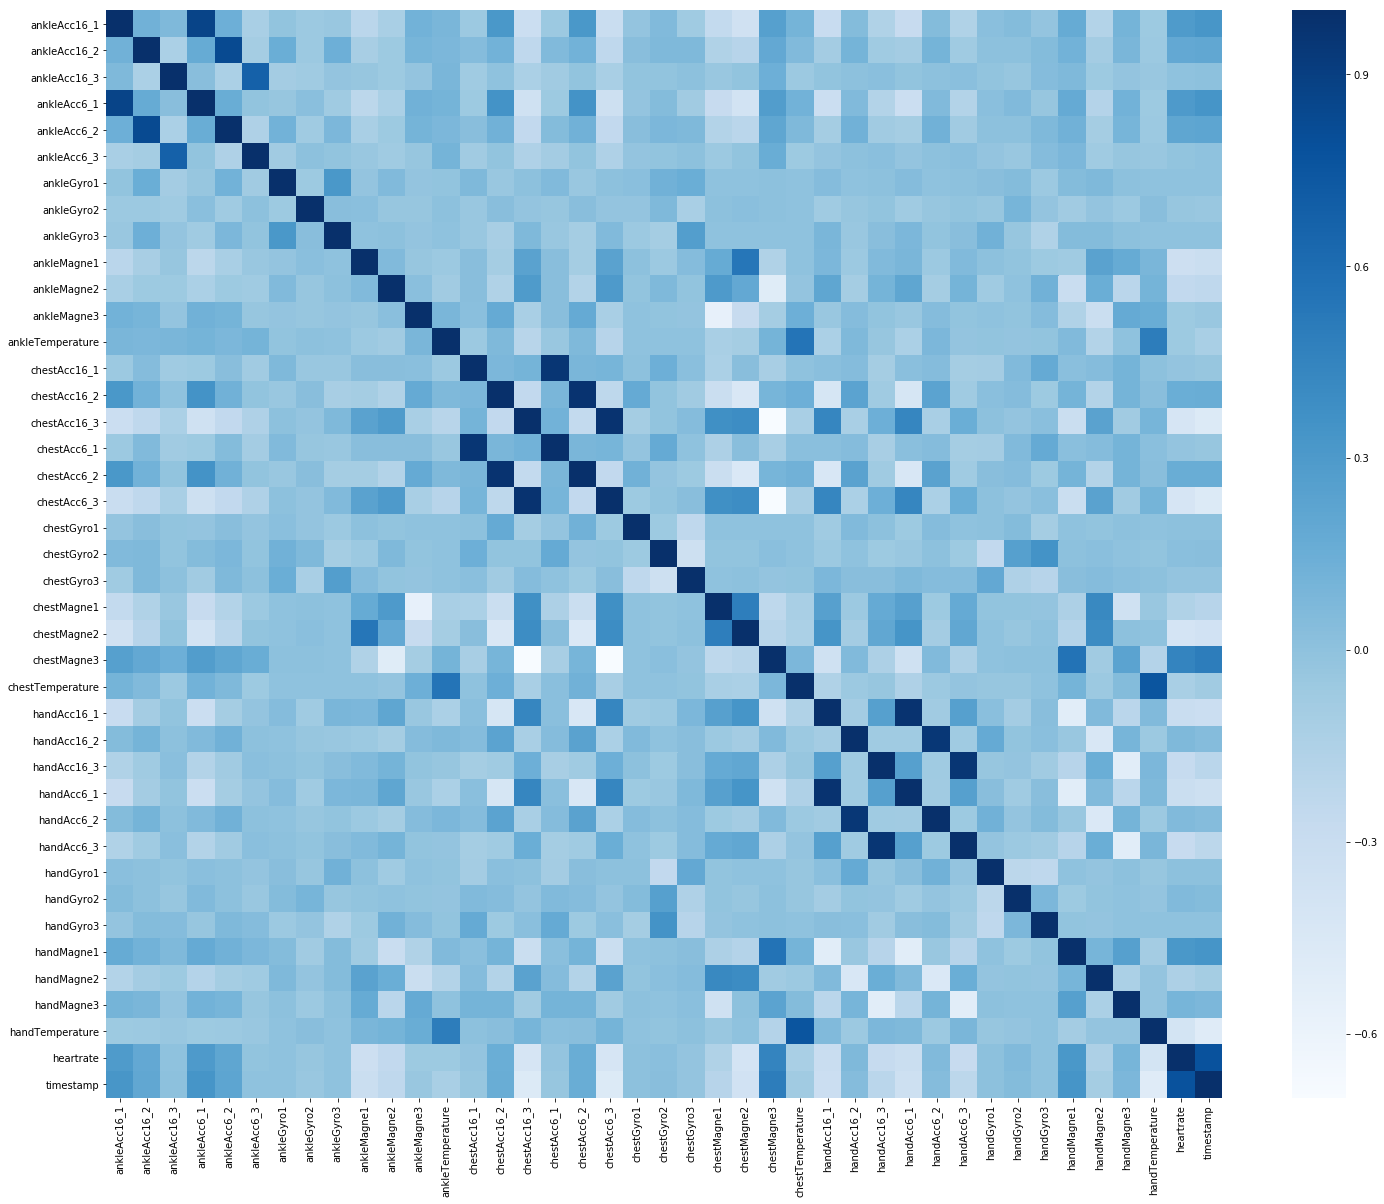

In [14]:
from pandas.plotting import scatter_matrix

f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr_df, mask=np.zeros_like(corr_df, dtype=np.bool), cmap = "Blues",ax=ax)
plt.show()

### 3.5 Covariance Matrix MRJob (Standardized)

Remove 'timestamp' column

In [11]:
numeric_data = numeric_data.drop('timestamp', axis=1)

In [71]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(numeric_data)
std_np = sc.transform(numeric_data)
df_std = pd.DataFrame(std_np, columns = numeric_data.columns)
df_std.to_csv("data/std_numeric_data.csv", index=False)

In [8]:
#!tail -n +2 data/std_numeric_data.csv | ./jobs/covariance_job.py -r hadoop --variables data/variables.txt > outputs/std_covariance.txt

In [15]:
covv = np.zeros((len(numeric_data.columns), len(numeric_data.columns)))
file = open("outputs/std_covariance.txt")
for line in file:
    key, value = line.split()
    key = re.findall(r'"([^"]*)"', key)[0]
    first, second = key.split("-")[0], key.split("-")[1]
    covv[int(first), int(second)] = float(value)
    
covv_dict = {}
for i, column in enumerate(list(numeric_data.columns)):
    covv_dict[column] = covv[:, i]
    
covv_df = pd.DataFrame(covv_dict, index=numeric_data.columns, columns=numeric_data.columns)
covv_df = covv_df.round(2)
covv_df.to_csv("outputs/std_covarinace.csv", index=False)

In [16]:
covv_df

ankleAcc16_1  ankleAcc16_2  ankleAcc16_3  ankleAcc6_1  \
ankleAcc16_1              1.00          0.13          0.07         0.87   
ankleAcc16_2              0.13          1.00         -0.13         0.17   
ankleAcc16_3              0.07         -0.13          1.00         0.03   
ankleAcc6_1               0.87          0.17          0.03         1.00   
ankleAcc6_2               0.14          0.83         -0.13         0.16   
ankleAcc6_3              -0.12         -0.10          0.68        -0.01   
ankleGyro1               -0.01          0.15         -0.09        -0.03   
ankleGyro2               -0.05         -0.05         -0.07         0.02   
ankleGyro3               -0.04          0.14         -0.02        -0.07   
ankleMagne1              -0.21         -0.11         -0.03        -0.22   
ankleMagne2              -0.12         -0.06         -0.06        -0.13   
ankleMagne3               0.12          0.10         -0.02         0.13   
ankleTemperature          0.09          0.08          0.09         0.11   
chestAcc16_1             -0.05          0.04         -0.07        -0.06   
chestAcc16_2              0.32          0.12         -0.00         0.35   
chestAcc16_3             -0.32         -0.24         -0.13        -0.35   
chestAcc6_1              -0.05          0.06         -0.08        -0.06   
chestAcc6_2               0.32          0.12         -0.01         0.35   
chestAcc6_3              -0.30         -0.24         -0.12        -0.34   
chestGyro1               -0.02          0.03         -0.01        -0.02   
chestGyro2                0.06          0.07         -0.01         0.05   
chestGyro3               -0.07          0.07          0.01        -0.08   
chestMagne1              -0.26         -0.16         -0.04        -0.28   
chestMagne2              -0.36         -0.19         -0.01        -0.38   
chestMagne3               0.26          0.19          0.14         0.28   
chestTemperature          0.11          0.06         -0.05         0.12   
handAcc16_1              -0.29         -0.09         -0.01        -0.32   
handAcc16_2               0.05          0.11          0.01         0.06   
handAcc16_3              -0.16         -0.07          0.02        -0.17   
handAcc6_1               -0.28         -0.09         -0.01        -0.32   
handAcc6_2                0.05          0.11          0.01         0.06   
handAcc6_3               -0.16         -0.07          0.02        -0.17   
handGyro1                 0.02          0.01         -0.01         0.02   
handGyro2                 0.05          0.01         -0.03         0.06   
handGyro3                -0.02          0.05          0.04        -0.03   
handMagne1                0.17          0.12          0.07         0.18   
handMagne2               -0.17         -0.09         -0.06        -0.18   
handMagne3                0.11          0.09         -0.02         0.12   
handTemperature          -0.06         -0.05         -0.04        -0.06   
heartrate                 0.29          0.19         -0.00         0.30   

                  ankleAcc6_2  ankleAcc6_3  ankleGyro1  ankleGyro2  \
ankleAcc16_1             0.14        -0.12       -0.01       -0.05   
ankleAcc16_2             0.83        -0.10        0.15       -0.05   
ankleAcc16_3            -0.13         0.68       -0.09       -0.07   
ankleAcc6_1              0.16        -0.01       -0.03        0.02   
ankleAcc6_2              1.00        -0.15        0.12       -0.07   
ankleAcc6_3             -0.15         1.00       -0.08        0.01   
ankleGyro1               0.12        -0.08        1.00       -0.06   
ankleGyro2              -0.07         0.01       -0.06        1.00   
ankleGyro3               0.08        -0.01        0.32        0.03   
ankleMagne1             -0.12        -0.04       -0.02        0.02   
ankleMagne2             -0.06        -0.07        0.06       -0.03   
ankleMagne3              0.11        -0.03       -0.02       -0.03   
ankleTemperature         0.08   

### 3.6 Principal Component Analysis (PCA)

### 3.6.1 Principal Component Analysis (PCA) from Scratch

In [3]:
std_numeric_data = pd.read_csv("data/std_numeric_data.csv", index_col=False)

#### Factorability Test

#### Bartlett’s test 

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(std_numeric_data)
chi_square_value, p_value

(58944176.2176072, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

#### Kaiser-Meyer-Olkin Test

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(std_numeric_data)
kmo_model

/home/ubuntu/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.7035939028231619

The overall KMO for our data is 0.70, which is good.

#### Calculate Eigen Vectors and Eigen Values

In [6]:
std_numeric_data = pd.read_csv("data/std_numeric_data.csv", index_col=False)
std_covv_df = pd.read_csv("outputs/std_covarinace.csv", index_col=False)

#### Check if Covariance Matrix is Symmetric

In [7]:
if np.array_equal(std_covv_df, std_covv_df.transpose()):
    print("The array is Symmetric")
else:
    print("The array is Not Symmetric")

The array is Symmetric


Since we ensure that our covariance matrix is symmetric, we are going to use "eigh" function instead of "eig" to calculates eigens.

In [8]:
eig_vals, eig_vecs = np.linalg.eigh(std_covv_df.to_numpy())
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.03077745  0.03985823 -0.02199451 ... -0.04333126  0.01356897
   0.22021961]
 [ 0.00233149  0.00188884 -0.00685824 ...  0.03364894  0.07760969
   0.13237578]
 [-0.0087971  -0.00812681 -0.01418738 ... -0.10133625 -0.17203831
   0.029041  ]
 ...
 [ 0.00383336  0.00130988  0.00771253 ...  0.24125954  0.09570874
   0.13142513]
 [ 0.01792095 -0.00484537  0.01366402 ... -0.29120216  0.24569809
  -0.04006794]
 [ 0.01004321 -0.01263045  0.00297764 ...  0.16429505 -0.17423069
   0.21660849]]

Eigenvalues 
[0.01234024 0.01605831 0.02125229 0.03409827 0.04227604 0.05103987
 0.09976977 0.15514748 0.16256638 0.18493484 0.23750027 0.29473924
 0.32492196 0.37100326 0.43527762 0.44556529 0.45970665 0.51127813
 0.53913615 0.57773689 0.64260575 0.73248231 0.79171783 0.87595918
 0.92321821 1.00949318 1.10711729 1.17427451 1.23656458 1.26703644
 1.37171328 1.66938198 1.79792123 1.95673703 2.09397317 2.15285453
 2.36912832 2.59868801 2.75461295 6.49817127]


#### Calculate Explained Variance

In [9]:
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [10]:
var_df = pd.DataFrame(
    [round(i * 100,3) for i in var_exp],
    index = ['PC'+str(x) for x in range(1,len(numeric_data.iloc[:,:-1].columns)+1)],
    columns = ['Explained Variance']
)
var_df

Explained Variance
PC1               16.245
PC2                6.887
PC3                6.497
PC4                5.923
PC5                5.382
PC6                5.235
PC7                4.892
PC8                4.495
PC9                4.173
PC10               3.429
PC11               3.168
PC12               3.091
PC13               2.936
PC14               2.768
PC15               2.524
PC16               2.308
PC17               2.190
PC18               1.979
PC19               1.831
PC20               1.607
PC21               1.444
PC22               1.348
PC23               1.278
PC24               1.149
PC25               1.114
PC26               1.088
PC27               0.928
PC28               0.812
PC29               0.737
PC30               0.594
PC31               0.462
PC32               0.406
PC33               0.388
PC34               0.249
PC35               0.128
PC36               0.106
PC37               0.085
PC38               0.053
PC39               0.040
PC40               0.031

#### Sort Eigen Vectors and Eigen Values

In [11]:
sorted_index = np.argsort(eig_vals)[::-1]
sorted_eigenvalue = eig_vals[sorted_index]
sorted_eigenvectors = eig_vecs[:,sorted_index]

In [12]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.49817127178236
2.7546129521311937
2.598688005513032
2.3691283182177814
2.152854526185579
2.0939731714415775
1.9567370260670136
1.7979212323229379
1.6693819801303247
1.3717132831469918
1.2670364426548897
1.236564580417775
1.1742745114549096
1.107117286566829
1.009493182672184
0.9232182140562972
0.8759591842033139
0.7917178283153042
0.7324823112238948
0.6426057453762158
0.5777368915274266
0.5391361496005672
0.5112781346777467
0.45970665350993317
0.4455652875272021
0.4352776226410655
0.3710032550878665
0.3249219596910497
0.2947392354957844
0.23750026770452742
0.18493483660745436
0.16256638232952583
0.15514747773247173
0.0997697690113744
0.051039872750090816
0.04227603580915991
0.0340982703704483
0.02125229120915279
0.016058312029636066
0.012340240807112266


#### Plot Components

In [13]:
px.bar(var_df, x=var_df.index, y="Explained Variance")

#### Loading Matrix

In [28]:
principal_components = np.round(eig_vecs.T,3)
loadings_df = pd.DataFrame(
    principal_components, 
    columns = ['PC'+str(x) for x in range(1,len(numeric_data.iloc[:,:-1].columns)+1)], 
    index = numeric_data.iloc[:,:-1].columns
)
loadings_df

PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8  \
ankleAcc16_1      0.031  0.002 -0.009 -0.027  0.001  0.007 -0.003  0.002   
ankleAcc16_2      0.040  0.002 -0.008 -0.033 -0.001  0.011 -0.002  0.001   
ankleAcc16_3     -0.022 -0.007 -0.014  0.014  0.004  0.006 -0.001 -0.005   
ankleAcc6_1      -0.018  0.004  0.003  0.008  0.005 -0.009 -0.010 -0.000   
ankleAcc6_2      -0.002 -0.014  0.000  0.011 -0.003  0.000  0.009 -0.004   
ankleAcc6_3      -0.033 -0.007  0.007  0.032  0.003 -0.017 -0.008 -0.002   
ankleGyro1        0.674  0.028 -0.206 -0.652  0.004  0.248 -0.005  0.039   
ankleGyro2       -0.028 -0.468 -0.044  0.062  0.458  0.084  0.018  0.032   
ankleGyro3       -0.034  0.466  0.085 -0.009 -0.496 -0.089 -0.005  0.033   
ankleMagne1      -0.035 -0.203 -0.023 -0.010  0.183  0.034 -0.000 -0.003   
ankleMagne2      -0.004 -0.006 -0.017  0.027 -0.019  0.028  0.007  0.021   
ankleMagne3      -0.002  0.017 -0.046  0.004 -0.016  0.026 -0.004 -0.016   
ankleTemperature  0.138 -0.105  0.622 -0.296  0.122 -0.644  0.020  0.107   
chestAcc16_1      0.011  0.024  0.153 -0.053  0.026 -0.057  0.038 -0.051   
chestAcc16_2     -0.028 -0.023 -0.116 -0.025 -0.013 -0.013 -0.098 -0.011   
chestAcc16_3     -0.044 -0.019 -0.144  0.015 -0.039  0.015 -0.042 -0.009   
chestAcc6_1      -0.027  0.078 -0.024  0.002  0.019  0.045  0.262 -0.074   
chestAcc6_2      -0.078 -0.055  0.026 -0.037 -0.019  0.060  0.165  0.153   
chestAcc6_3       0.051  0.005 -0.023  0.024 -0.017 -0.043  0.163 -0.050   
chestGyro1        0.047  0.008  0.024  0.095  0.045  0.037  0.355  0.273   
chestGyro2        0.028 -0.084 -0.017 -0.009 -0.074 -0.072 -0.339 -0.001   
chestGyro3        0.108 -0.015 -0.031  0.104 -0.046 -0.025 -0.031  0.214   
chestMagne1      -0.093 -0.140 -0.114 -0.099 -0.124 -0.055  0.286 -0.018   
chestMagne2      -0.008  0.008  0.016 -0.012  0.023 -0.023 -0.154 -0.260   
chestMagne3       0.078 -0.067 -0.019  0.091 -0.079 -0.016  0.103  0.157   
chestTemperature  0.017 -0.234 -0.077 -0.073 -0.203 -0.156  0.336 -0.718   
handAcc16_1       0.130 -0.032  0.082  0.116 -0.059  0.036  0.173  0.002   
handAcc16_2      -0.334  0.178  0.066 -0.310  0.196  0.130 -0.183 -0.200   
handAcc16_3       0.302  0.191  0.109  0.283  0.219 -0.010 -0.353 -0.356   
handAcc6_1        0.026  0.241  0.369  0.046  0.202  0.354  0.279 -0.029   
handAcc6_2       -0.326  0.087 -0.195 -0.300  0.098 -0.114 -0.154  0.124   
handAcc6_3       -0.006  0.111 -0.272  0.001  0.133 -0.259 -0.036  0.141   
handGyro1         0.246 -0.103 -0.055  0.232 -0.097 -0.099 -0.095  0.009   
handGyro2        -0.120  0.089  0.292 -0.110  0.090  0.318 -0.013 -0.034   
handGyro3         0.140  0.317 -0.195  0.132  0.316 -0.210  0.151  0.000   
handMagne1       -0.049  0.313 -0.195 -0.059  0.302 -0.186  0.246 -0.099   
handMagne2        0.046 -0.155  0.025  0.052 -0.157  0.023 -0.070  0.082   
handMagne3       -0.043  0.034 -0.101 -0.054  0.035 -0.102  0.058 -0.008   
handTemperature   0.014  0.078 -0.172  0.009  0.084 -0.184  0.026 -0.005   
heartrate         0.220  0.132  0.029  0.235  0.140  0.025 -0.008  0.002   

                    PC9   PC10  ...   PC31   PC32   PC33   PC34   PC35   PC36  \
ankleAcc16_1      0.001  0.003  ... -0.015  0.040  0.006  0.002  0.002  0.001   
ankleAcc16_2     -0.000  0.009  ... -0.202  0.050 -0.001  0.013  0.004  0.004   
ankleAcc16_3      0.012  0.005  ... -0.022  0.011  0.001  0.004  0.001 -0.002   
ankleAcc6_1       0.012 -0.003  ... -0.140  0.518 -0.010  0.008 -0.006  0.008   
ankleAcc6_2       0.012  0.001  ... -0.246  0.387 -0.020  0.009  0.024  0.005   
ankleAcc6_3       0.032 -0.005  ... -0.617 -0.282 -0.037 -0.029  0.017 -0.006   
ankleGyro1       -0.029 -0.003  ... -0.020 -0.000  0.001  0.011 -0.008  0.004   
ankleGyro2        0.038 -0.029  ...  0.004  0.014  0.008  0.029  0.036  0.189   
ankleGyro3       -0.044 -0.002  ...  0.016  0.017  0.010  0.030  0.027  0.119   
ankleMagne1      -0.010  0.079  ...  0.023  0.001 -0.012 -0.003 -0.052 -0.245   
ankleMagne2 

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



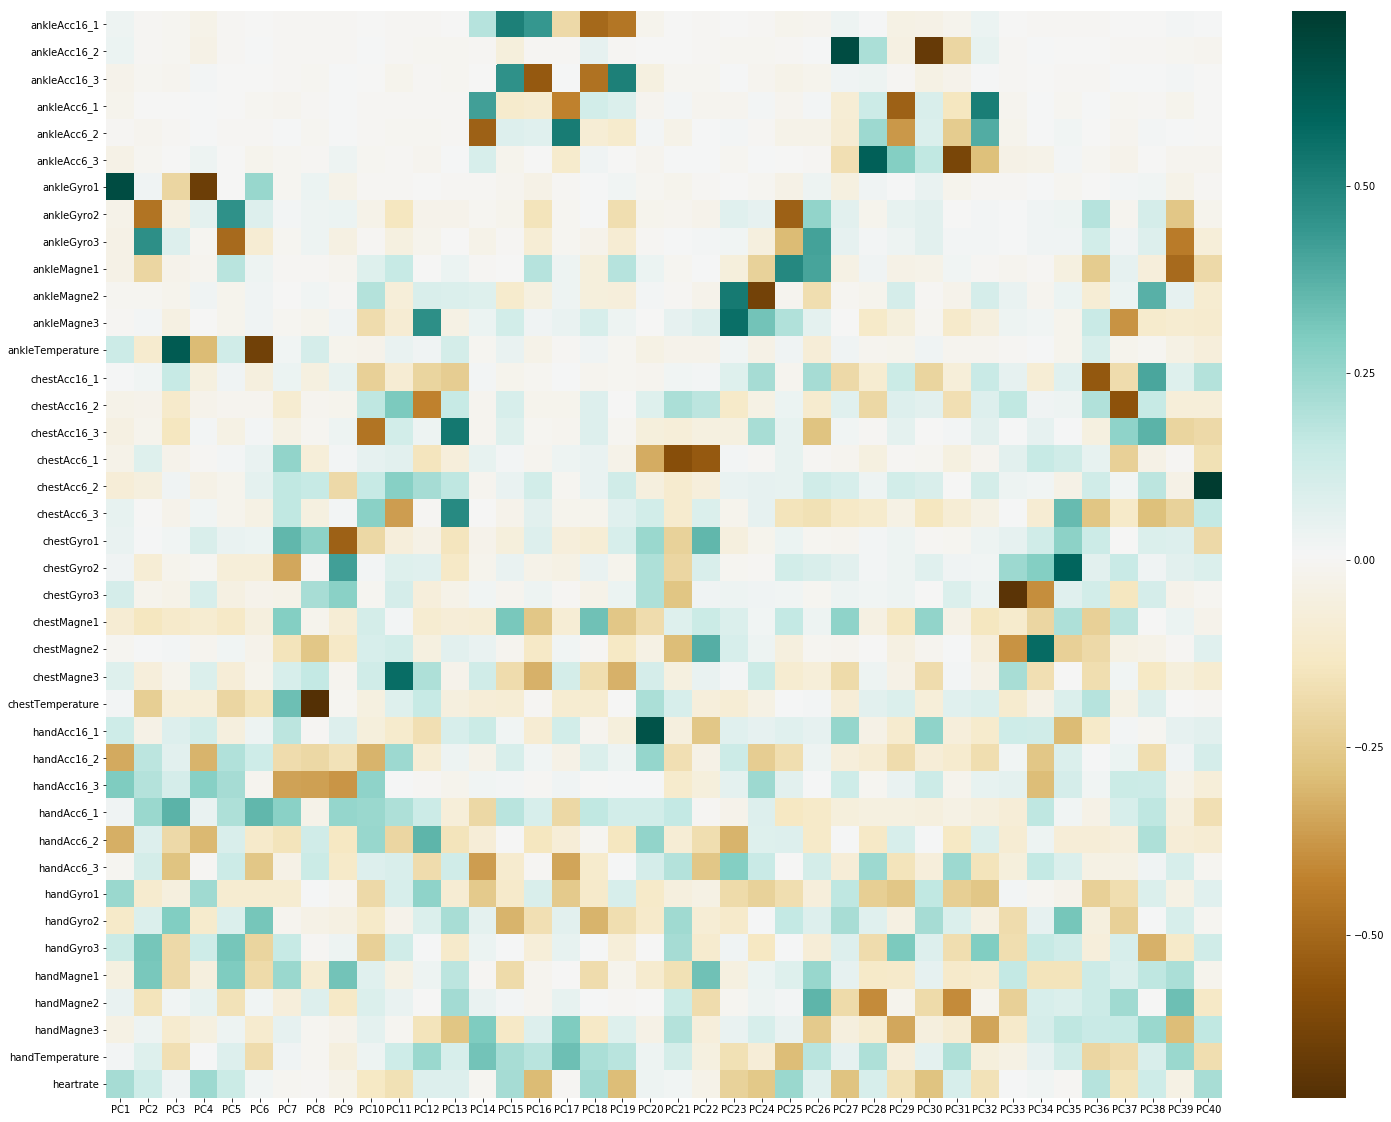

In [29]:
from pandas.plotting import scatter_matrix

f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(loadings_df, mask=np.zeros_like(loadings_df, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

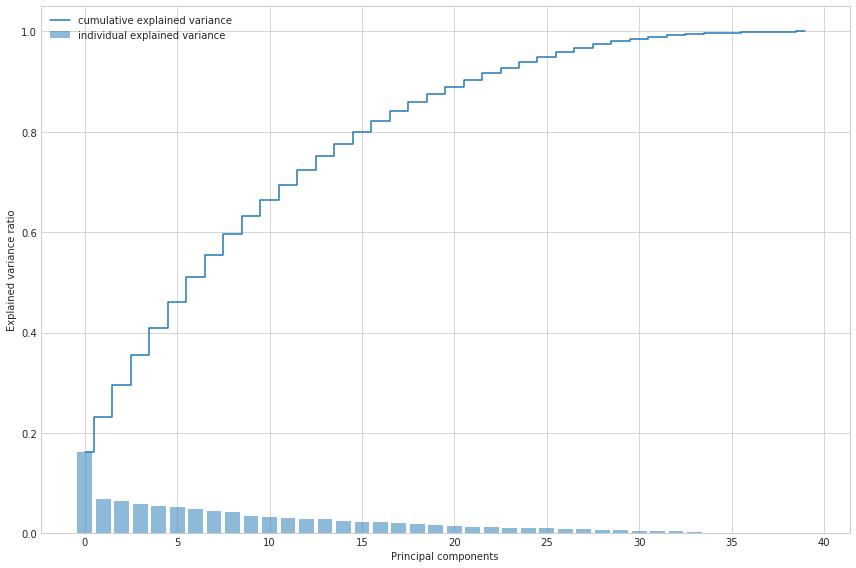

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))

    plt.bar(range(len(numeric_data.columns)), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.step(range(len(numeric_data.columns)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

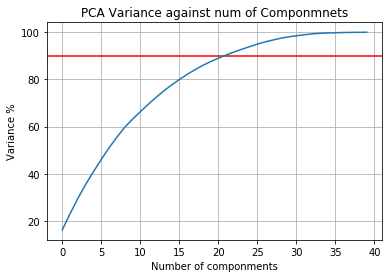

In [17]:
plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(90, color="red")

plt.plot(cum_var_exp * 100)
plt.grid()

#### Transform the Data

In [18]:
num_components = 20
eigenvector_subset = sorted_eigenvectors[:,0:num_components]
numeric_data_reduced = np.dot(eigenvector_subset.transpose() , std_numeric_data.transpose() ).transpose()

In [19]:
numeric_data.shape ,numeric_data_reduced.shape

((1921427, 40), (1921427, 20))

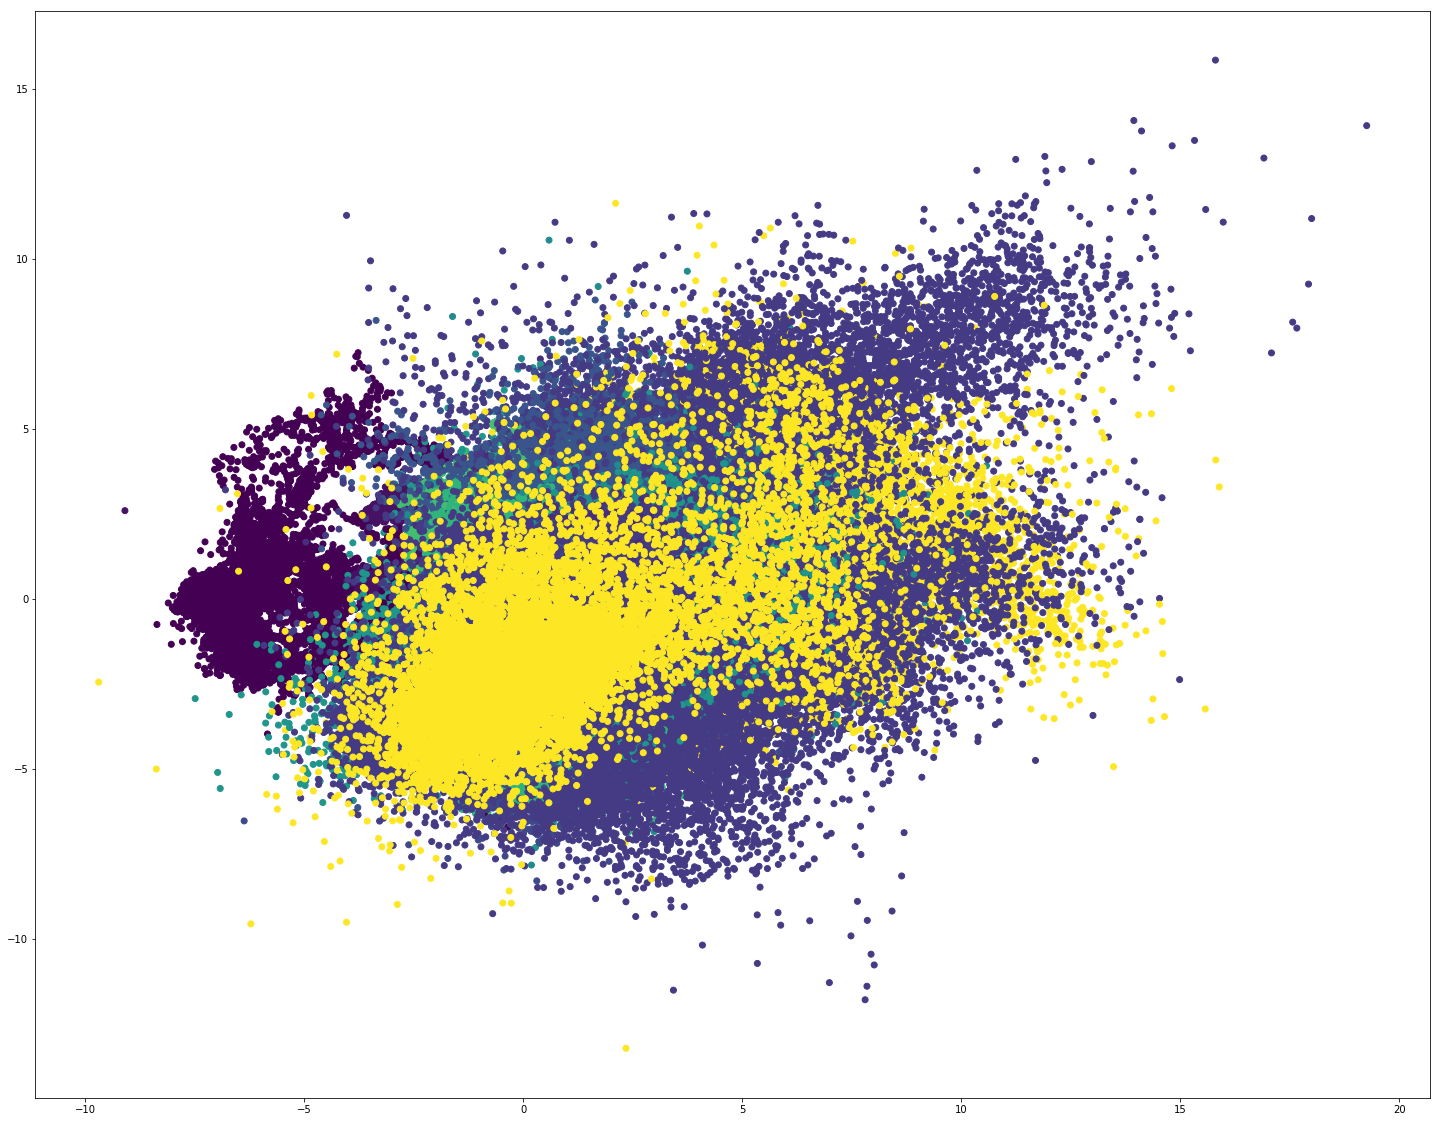

In [26]:
plt.figure(figsize=(25, 20))
plt.scatter(numeric_data_reduced[:, 0], numeric_data_reduced[:, 1], c=y)

In [27]:
principal_df = pd.DataFrame(numeric_data_reduced , columns = ["PCA{}".format(i) for i in range(1,num_components+1)])
principal_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0        0.287630 -2.007522  0.915522 -3.585610 -2.393338  0.587599  0.520724   
1        0.302472 -2.043723  0.909931 -3.596400 -2.379141  0.589421  0.503187   
2        0.291360 -2.025332  0.887479 -3.677856 -2.354799  0.565047  0.490661   
3        0.311910 -2.025514  0.908288 -3.683149 -2.370933  0.549762  0.509596   
4        0.342337 -1.993685  0.913236 -3.697319 -2.363352  0.510831  0.526654   
...           ...       ...       ...       ...       ...       ...       ...   
1921422 -0.754553 -2.656362  1.412849 -4.214572 -2.557538  1.999173 -0.360445   
1921423 -0.773088 -2.648578  1.448134 -4.190904 -2.561283  2.005399 -0.350141   
1921424 -0.772403 -2.617548  1.501507 -4.179739 -2.537093  1.993665 -0.356275   
1921425 -0.756955 -2.569620  1.514976 -4.181844 -2.530430  2.006923 -0.362866   
1921426 -0.743737 -2.586716  1.593642 -4.142083 -2.508408  1.955035 -0.380062   

             PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0       -0.207810 -1.088482 -0.424477 -0.883312 -0.414925 -0.445757  1.037365   
1       -0.207300 -1.046430 -0.419719 -0.915575 -0.450309 -0.440056  1.045525   
2       -0.209285 -1.033469 -0.463105 -0.915150 -0.449433 -0.414664  1.096113   
3       -0.205668 -1.006731 -0.496853 -0.938985 -0.464324 -0.401776  1.066147   
4       -0.204811 -1.055928 -0.479741 -0.925146 -0.462983 -0.406665  1.094853   
...           ...       ...       ...       ...       ...       ...       ...   
1921422  0.777250 -0.889291 -0.148876 -0.519088  0.006179 -0.041625  0.276504   
1921423  0.788031 -0.859499 -0.088332 -0.551249  0.004392  0.015007  0.378915   
1921424  0.740637 -0.908621 -0.074748 -0.530515  0.042688  0.043636  0.453501   
1921425  0.766986 -0.974621 -0.097890 -0.549162  0.029214  0.063423  0.478900   
1921426  0.802239 -0.965182 -0.125556 -0.509766  0.016694  0.099575  0.523049   

            PCA15     PCA16     PCA17     PCA18     PCA19     PCA20  
0       -0.508521 -2.428752 -0.426173  0.787157  0.685384 -0.411343  
1       -0.535463 -2.397341 -0.468032  0.789789  0.608956 -0.365923  
2       -0.517820 -2.393570 -0.504148  0.772514  0.567557 -0.334992  
3       -0.551575 -2.398875 -0.527877  0.787485  0.568998 -0.321543  
4       -0.586504 -2.356427 -0.576377  0.779295  0.598305 -0.365187  
...           ...       ...       ...       ...       ...       ...  
1921422 -0.467706 -0.463971  0.337248  1.515538  0.416152  0.148491  
1921423 -0.451692 -0.396527  0.300042  1.465355  0.446404  0.178876  
1921424 -0.405647 -0.409189  0.342294  1.464101  0.459090  0.218093  
1921425 -0.427659 -0.365692  0.376139  1.459546  0.418741  0.239524  
1921426 -0.460978 -0.393698  0.391794  1.483116  0.432952  0.231189  

[1921427 rows x 20 columns]

### 3.6.1 Principal Component Analysis (PCA) with Scikit-learn

In [28]:
from sklearn.decomposition import PCA

fit = PCA()
fit = fit.fit(std_numeric_data)
df_trans= fit.transform(std_numeric_data)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear

In [29]:
var_df = pd.DataFrame(
    np.round(fit.explained_variance_ratio_ * 100,3),
    index = ['PC'+str(x) for x in range(1,len(std_numeric_data.columns)+1)],
    columns = ['Explained Variance']
)
var_df

Explained Variance
PC1               16.259
PC2                6.876
PC3                6.511
PC4                5.917
PC5                5.393
PC6                5.230
PC7                4.896
PC8                4.479
PC9                4.178
PC10               3.412
PC11               3.173
PC12               3.084
PC13               2.930
PC14               2.772
PC15               2.520
PC16               2.322
PC17               2.177
PC18               1.983
PC19               1.820
PC20               1.597
PC21               1.440
PC22               1.357
PC23               1.294
PC24               1.160
PC25               1.117
PC26               1.096
PC27               0.934
PC28               0.811
PC29               0.742
PC30               0.566
PC31               0.458
PC32               0.408
PC33               0.399
PC34               0.245
PC35               0.136
PC36               0.087
PC37               0.081
PC38               0.055
PC39               0.048
PC40               0.034

In [30]:
px.bar(var_df, x=var_df.index, y="Explained Variance")

In [31]:
principal_components = np.round(fit.components_,3)
loadings_df = pd.DataFrame(
    principal_components, 
    columns = ['PC'+str(x) for x in range(1,len(std_numeric_data.columns)+1)], 
    index = std_numeric_data.columns
)
loadings_df

PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8  \
ankleAcc16_1      0.219  0.133  0.028  0.235  0.140  0.024 -0.008  0.002   
ankleAcc16_2      0.014  0.077 -0.170  0.011  0.081 -0.180  0.025 -0.005   
ankleAcc16_3      0.039 -0.035  0.107  0.050 -0.037  0.111 -0.058  0.004   
ankleAcc6_1       0.050 -0.157  0.026  0.054 -0.157  0.024 -0.068  0.082   
ankleAcc6_2      -0.041  0.330 -0.212 -0.052  0.317 -0.204  0.255 -0.101   
ankleAcc6_3       0.138  0.296 -0.186  0.134  0.299 -0.200  0.140  0.010   
ankleGyro1        0.122 -0.088 -0.290  0.114 -0.089 -0.320  0.012  0.038   
ankleGyro2        0.253 -0.095 -0.067  0.234 -0.093 -0.112 -0.088  0.021   
ankleGyro3        0.015 -0.117  0.259  0.010 -0.136  0.242  0.036 -0.141   
ankleMagne1       0.327 -0.072  0.217  0.302 -0.090  0.129  0.167 -0.132   
ankleMagne2      -0.038 -0.244 -0.364 -0.054 -0.209 -0.343 -0.268  0.035   
ankleMagne3       0.320  0.180  0.091  0.302  0.204 -0.025 -0.358 -0.328   
ankleTemperature  0.310 -0.198 -0.088  0.280 -0.209 -0.146  0.185  0.194   
chestAcc16_1      0.138 -0.046  0.068  0.126 -0.075  0.032  0.185  0.039   
chestAcc16_2     -0.009  0.224  0.075  0.082  0.197  0.158 -0.315  0.745   
chestAcc16_3      0.077 -0.086 -0.029  0.087 -0.098 -0.031  0.136  0.147   
chestAcc6_1       0.005  0.005  0.015 -0.004  0.024 -0.024 -0.142 -0.241   
chestAcc6_2       0.088  0.133  0.111  0.091  0.119  0.057 -0.271  0.013   
chestAcc6_3      -0.109  0.014  0.022 -0.102  0.047  0.029  0.016 -0.202   
chestGyro1        0.029 -0.079 -0.036  0.002 -0.083 -0.066 -0.364 -0.004   
chestGyro2       -0.059 -0.016 -0.014 -0.100 -0.041 -0.036 -0.361 -0.244   
chestGyro3        0.042 -0.004 -0.027  0.012 -0.018 -0.036  0.137 -0.058   
chestMagne1       0.080  0.052  0.005  0.023  0.026 -0.093 -0.201 -0.167   
chestMagne2       0.011 -0.085 -0.016  0.005 -0.017 -0.027 -0.250  0.084   
chestMagne3       0.024 -0.002  0.103  0.003  0.017 -0.013 -0.021  0.038   
chestTemperature  0.052  0.022  0.156  0.015  0.017 -0.011  0.054  0.020   
handAcc16_1       0.014  0.028  0.168 -0.049  0.017 -0.064  0.032 -0.054   
handAcc16_2       0.153 -0.117  0.614 -0.316  0.134 -0.634  0.021  0.116   
handAcc16_3       0.006  0.018 -0.007 -0.016 -0.009 -0.009 -0.000 -0.010   
handAcc6_1        0.005 -0.006  0.001  0.013 -0.019  0.000 -0.002  0.013   
handAcc6_2        0.024  0.148  0.007  0.028 -0.129 -0.017 -0.006 -0.006   
handAcc6_3        0.045  0.001 -0.044 -0.035  0.023  0.023 -0.008 -0.047   
handGyro1        -0.021 -0.674 -0.094  0.076  0.684  0.126  0.016 -0.008   
handGyro2         0.673  0.012 -0.224 -0.645  0.020  0.267 -0.007  0.035   
handGyro3         0.001 -0.016 -0.002 -0.001  0.014 -0.002 -0.002 -0.001   
handMagne1       -0.008  0.004 -0.002 -0.001  0.010 -0.001 -0.010  0.001   
handMagne2        0.000  0.002 -0.001 -0.006  0.004 -0.000 -0.005  0.003   
handMagne3       -0.006 -0.008 -0.003 -0.003  0.008  0.002 -0.006  0.002   
handTemperature  -0.003  0.002  0.004  0.001 -0.005 -0.006  0.004 -0.001   
heartrate        -0.004 -0.011 -0.003 -0.013  0.015  0.000 -0.002 -0.003   

                    PC9   PC10  ...   PC31   PC32   PC33   PC34   PC35   PC36  \
ankleAcc16_1     -0.028 -0.132  ...  0.103 -0.158  0.008  0.023 -0.001  0.189   
ankleAcc16_2     -0.054  0.031  ...  0.206 -0.056 -0.040  0.055  0.121 -0.211   
ankleAcc16_3      0.028 -0.061  ...  0.100  0.345  0.121 -0.117 -0.179 -0.147   
ankleAcc6_1      -0.120  0.091  ... -0.405 -0.011 -0.215  0.094  0.078  0.134   
ankleAcc6_2       0.332  0.056  ... -0.123 -0.082  0.157 -0.150 -0.150  0.136   
ankleAcc6_3       0.010 -0.226  ... -0.163  0.309 -0.191  0.161  0.137 -0.077   
ankleGyro1        0.042  0.122  ... -0.073  0.045  0.180 -0.051 -0.313  0.053   
ankleGyro2       -0.008 -0.200  ... -0.228 -0.262  0.011 -0.005 -0.023 -0.227   
ankleGyro3        0.114 -0.098  ... -0.243  0.148  0.069 -0.157 -0.103  0.033   
ankleMagne1       0.150 -0.234  ...  0.131 -0.088  0.081 -0.022  0.084  0.079   
ankleMagne2 

### 3.8 Exploratory Data Analysis (Categorical Variables)

In [5]:
import seaborn as sns

In [6]:
categorical_data = pd.read_csv("data/categorical_data.csv", index_col=False)

In [7]:
categorical_data

activityID  subject_id
0                 1           1
1                 1           1
2                 1           1
3                 1           1
4                 1           1
...             ...         ...
1921422          24           9
1921423          24           9
1921424          24           9
1921425          24           9
1921426          24           9

[1921427 rows x 2 columns]

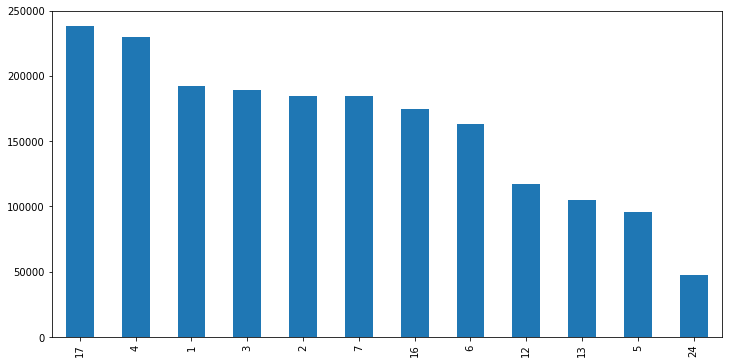

In [31]:
categorical_data['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

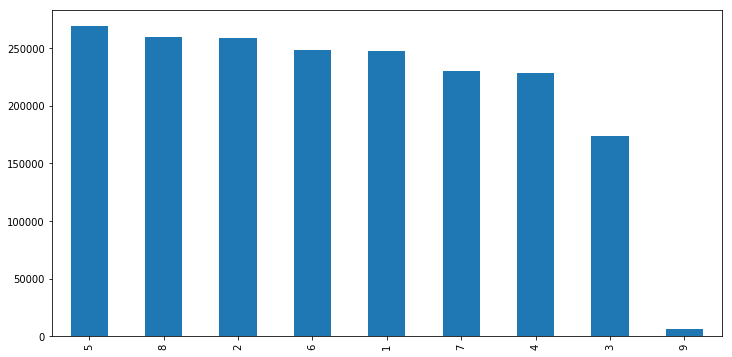

In [32]:
categorical_data['subject_id'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

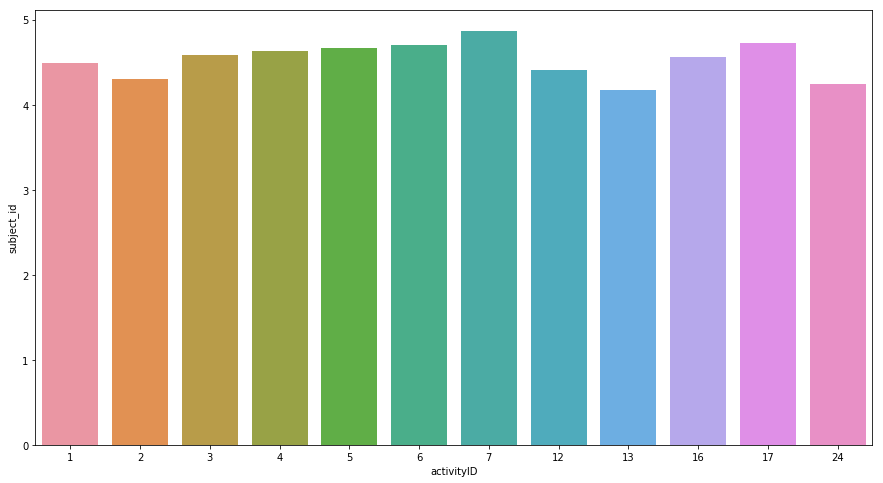

In [5]:
plt.figure(figsize=(15,8))
sns.barplot(x='activityID', y='subject_id', data=categorical_data, ci=None) 

#### Chi-Square Test

In [11]:
subject_id_activityID = pd.crosstab(categorical_data["subject_id"], categorical_data["activityID"])

In [12]:
subject_id_activityID

activityID     1      2      3      4      5      6      7      12     13  \
subject_id                                                                  
1           27175  23465  21593  21383  20684  23492  20053  15875  14892   
2           23272  22322  25416  31500   8775  24595  28451  17334  15190   
3           22041  28738  20408  28293      0      0      0  10366  15268   
4           23029  25478  24651  30030      1  22609  26690  16683  14279   
5           23670  26720  22071  30553  24301  24361  25932  14250  12715   
6           23330  22808  24064  25356  22191  20432  26490  13285  11258   
7           25610  12216  25712  32251   3495  22583  28408  17622  11612   
8           24159  22898  25069  30343  16194  25230  28420  11679   9651   
9               0      0      0      0      0      0      0      0      0   

activityID     16     17     24  
subject_id                       
1           22875  23493  12224  
2           20665  28807  12801  
3           20288  27939      0  
4           19993  24942      0  
5           24396  32894   7448  
6           21029  37584    253  
7           21510  29358      0  
8           24220  32885   8467  
9               0      0   6386

In [13]:
observed_values_subject_id_activityID = subject_id_activityID.values 
print("Observed Values / subject_id-activityID :-\n",observed_values_subject_id_activityID)

Observed Values / subject_id-activityID :-
 [[27175 23465 21593 21383 20684 23492 20053 15875 14892 22875 23493 12224]
 [23272 22322 25416 31500  8775 24595 28451 17334 15190 20665 28807 12801]
 [22041 28738 20408 28293     0     0     0 10366 15268 20288 27939     0]
 [23029 25478 24651 30030     1 22609 26690 16683 14279 19993 24942     0]
 [23670 26720 22071 30553 24301 24361 25932 14250 12715 24396 32894  7448]
 [23330 22808 24064 25356 22191 20432 26490 13285 11258 21029 37584   253]
 [25610 12216 25712 32251  3495 22583 28408 17622 11612 21510 29358     0]
 [24159 22898 25069 30343 16194 25230 28420 11679  9651 24220 32885  8467]
 [    0     0     0     0     0     0     0     0     0     0     0  6386]]


In [14]:
import scipy.stats as stats

In [15]:
val_subject_id_activityID = stats.chi2_contingency(subject_id_activityID)

In [16]:
val_subject_id_activityID

(417662.4249647948,
 0.0,
 88,
 array([[24738.83647102, 23755.77244413, 24314.01283317, 29553.54725212,
         12304.83269154, 21009.85757356, 23729.91249524, 15064.89977293,
         13491.55989793, 22511.7931121 , 30607.62964609,  6121.34581017],
        [25932.12576278, 24901.64318499, 25486.81055903, 30979.07635939,
         12898.36202364, 22023.27783257, 24874.53586943, 15791.56222537,
         14142.33156919, 23597.65993087, 32084.00290826,  6416.61177448],
        [17347.02776947, 16657.69708919, 17049.13876197, 20723.13325929,
          8628.22609498, 14732.24430697, 16639.56393035, 10563.60249648,
          9460.366678  , 15785.4109555 , 21462.26246534,  4292.32619246],
        [22855.53295025, 21947.30704055, 22463.05003521, 27303.71227478,
         11368.09766127, 19410.43155426, 21923.41574257, 13918.04798725,
         12464.48240032, 20798.02863184, 28277.55010729,  5655.34361441],
        [26951.18521078, 25880.20757229, 26488.37037473, 32196.46674008,
         13405.2

In [17]:
expected_values_subject_id_activityID = val_subject_id_activityID[3]

In [18]:
alpha = 0.05

no_of_rows_subject_id_activityID=len(subject_id_activityID.iloc[0:2,0])
no_of_columns_subject_id_activityID=len(subject_id_activityID.iloc[0,0:2])
ddof_subject_id_activityID=(no_of_rows_subject_id_activityID-1)*(no_of_columns_subject_id_activityID-1)
print("Degree of Freedom / neo-pha:-",ddof_subject_id_activityID)

Degree of Freedom / neo-pha:- 1


In [19]:
from scipy.stats import chi2

chi_square_subject_id_activityID=sum([(o-e)**2./e for o,e in zip(observed_values_subject_id_activityID,expected_values_subject_id_activityID)])
chi_square_statistic_subject_id_activityID=chi_square_subject_id_activityID[0]+chi_square_subject_id_activityID[1]

In [20]:
p_value_subject_id_activityID=1-chi2.cdf(x=chi_square_statistic_subject_id_activityID,df=ddof_subject_id_activityID)

print('p-value / subject_id-activityID:',p_value_subject_id_activityID)

p-value / subject_id-activityID: 0.0


In [21]:
if p_value_subject_id_activityID<=alpha:
    print("subject_id-activityID: Reject H0,There is a relationship between 2 categorical variables")
else:
    print("subject_id-activityID: Retain H0,There is no relationship between 2 categorical variables")

subject_id-activityID: Reject H0,There is a relationship between 2 categorical variables


## 4. Modelling

### 4.1 Modelling on Raw Dataset

#### Raw Dataset

In [34]:
raw_ds = pd.concat([std_numeric_data, pd.DataFrame(y_df)], axis = 1)
raw_ds

ankleAcc16_1  ankleAcc16_2  ankleAcc16_3  ankleAcc6_1  ankleAcc6_2  \
0            0.060140     -0.222343      0.687540     0.047972    -0.235685   
1            0.041981     -0.226979      0.637941     0.040533    -0.235683   
2            0.042072     -0.212165      0.637762     0.052959    -0.237795   
3            0.041843     -0.222000      0.628009     0.043026    -0.237797   
4            0.060369     -0.212509      0.697293     0.043027    -0.231447   
...               ...           ...           ...          ...          ...   
1921422      0.003421     -0.268925      0.085125     0.009284    -0.308020   
1921423     -0.002708     -0.273749      0.065340    -0.003182    -0.303802   
1921424     -0.002677     -0.268811      0.065279    -0.005646    -0.303797   
1921425      0.009182     -0.268957      0.085222     0.004235    -0.308043   
1921426      0.009490     -0.273978      0.105027     0.009244    -0.303797   

         ankleAcc6_3  ankleGyro1  ankleGyro2  ankleGyro3  ankleMagne1  ...  \
0           0.713666   -0.006002   -0.023501   -0.003943    -1.559988  ...   
1           0.718108   -0.003825    0.011192    0.001304    -1.621021  ...   
2           0.722381    0.025623    0.002712   -0.004213    -1.633335  ...   
3           0.722473   -0.016439    0.027431    0.002520    -1.634521  ...   
4           0.722431    0.027880    0.085874   -0.006730    -1.645419  ...   
...              ...         ...         ...         ...          ...  ...   
1921422     0.119698    0.011777    0.033329    0.002184    -0.775462  ...   
1921423     0.097918    0.002348    0.059404   -0.002892    -0.788934  ...   
1921424     0.106685   -0.022313   -0.001866   -0.001925    -0.760689  ...   
1921425     0.084756   -0.032239   -0.003889   -0.004319    -0.782198  ...   
1921426     0.102175   -0.019077    0.005999    0.008384    -0.796394  ...   

         handAcc6_3  handGyro1  handGyro2  handGyro3  handMagne1  handMagne2  \
0          0.546725  -0.053495  -0.060890   0.004903   -0.498574   -2.196403   
1          0.562061   0.047452  -0.034097   0.017540   -0.521721   -2.177249   
2          0.565735   0.143184  -0.038361   0.026372   -0.498415   -2.183002   
3          0.561785   0.150342  -0.051370   0.045094   -0.485022   -2.201356   
4          0.542618   0.153185  -0.113346   0.033432   -0.498745   -2.191781   
...             ...        ...        ...        ...         ...         ...   
1921422    0.477773  -0.218807  -0.157381   0.151879   -1.084367   -0.171778   
1921423    0.447208  -0.208434  -0.176490   0.169994   -1.073763   -0.167230   
1921424    0.420429  -0.219349  -0.174588   0.178834   -1.058351   -0.162904   
1921425    0.378417  -0.177519  -0.148256   0.175074   -1.078798   -0.177213   
1921426    0.340270  -0.197509  -0.140233   0.169238   -1.095140   -0.150721   

         handMagne3  handTemperature  heartrate  activityID  
0          0.216393        -1.332558  -0.271718           1  
1          0.228465        -1.332558  -0.271718           1  
2          0.222319        -1.332558  -0.271718           1  
3          0.187375        -1.332558  -0.271718           1  
4          0.204947        -1.332558  -0.271718           1  
...             ...              ...        ...         ...  
1921422   -1.184945        -4.264482   2.027391          24  
1921423   -1.217627        -4.264482   2.027391          24  
1921424   -1.191593        -4.264482   2.027391          24  
1921425   -1.224066        -4.264482   2.027391          24  
1921426   -1.178546        -4.264482   2.027391          24  

[1921427 rows x 41 columns]

In [35]:
#raw_ds.to_csv("data/raw_ds", index=False)
raw_ds = pd.read_csv("data/raw_ds", index_col=False)

In [36]:
from sklearn.model_selection import train_test_split
X = raw_ds.drop('activityID', axis=1).values
y = raw_ds['activityID'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs =4, verbose=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

In [38]:
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
acc = accuracy_score(y_test,y_pred)
err = 1-acc
p = precision_score(y_test,y_pred,average=None).mean()
r = recall_score(y_test,y_pred, average=None).mean()
f1 = f1_score(y_test,y_pred, average=None).mean()

print("Accuracy: ",acc)
print("Error: ",acc)
print("Precision", p)
print("Recall", r)
print("F1", f1)

Accuracy:  0.9995189813128182
Error:  0.9995189813128182
Precision 0.9994670434807521
Recall 0.9994039378099432
F1 0.9994354424644997


Text(0,0.5,'FEATURE NAMES')

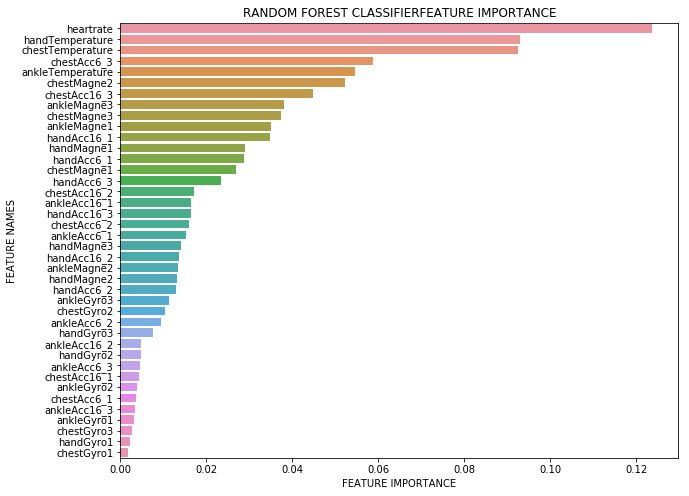

In [39]:
model_type = "RANDOM FOREST CLASSIFIER"
#Create arrays from feature importance and feature names
feature_importance = np.array(rfc.feature_importances_)
feature_names = np.array(raw_ds.columns[:-1])

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title(model_type + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

### 4.2 Modelling on Components

#### Dataset with Principle Components

In [40]:
principal_df = pd.concat([principal_df , pd.DataFrame(y_df)] , axis = 1)

In [41]:
principal_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0        0.287630 -2.007522  0.915522 -3.585610 -2.393338  0.587599  0.520724   
1        0.302472 -2.043723  0.909931 -3.596400 -2.379141  0.589421  0.503187   
2        0.291360 -2.025332  0.887479 -3.677856 -2.354799  0.565047  0.490661   
3        0.311910 -2.025514  0.908288 -3.683149 -2.370933  0.549762  0.509596   
4        0.342337 -1.993685  0.913236 -3.697319 -2.363352  0.510831  0.526654   
...           ...       ...       ...       ...       ...       ...       ...   
1921422 -0.754553 -2.656362  1.412849 -4.214572 -2.557538  1.999173 -0.360445   
1921423 -0.773088 -2.648578  1.448134 -4.190904 -2.561283  2.005399 -0.350141   
1921424 -0.772403 -2.617548  1.501507 -4.179739 -2.537093  1.993665 -0.356275   
1921425 -0.756955 -2.569620  1.514976 -4.181844 -2.530430  2.006923 -0.362866   
1921426 -0.743737 -2.586716  1.593642 -4.142083 -2.508408  1.955035 -0.380062   

             PCA8      PCA9     PCA10  ...     PCA12     PCA13     PCA14  \
0       -0.207810 -1.088482 -0.424477  ... -0.414925 -0.445757  1.037365   
1       -0.207300 -1.046430 -0.419719  ... -0.450309 -0.440056  1.045525   
2       -0.209285 -1.033469 -0.463105  ... -0.449433 -0.414664  1.096113   
3       -0.205668 -1.006731 -0.496853  ... -0.464324 -0.401776  1.066147   
4       -0.204811 -1.055928 -0.479741  ... -0.462983 -0.406665  1.094853   
...           ...       ...       ...  ...       ...       ...       ...   
1921422  0.777250 -0.889291 -0.148876  ...  0.006179 -0.041625  0.276504   
1921423  0.788031 -0.859499 -0.088332  ...  0.004392  0.015007  0.378915   
1921424  0.740637 -0.908621 -0.074748  ...  0.042688  0.043636  0.453501   
1921425  0.766986 -0.974621 -0.097890  ...  0.029214  0.063423  0.478900   
1921426  0.802239 -0.965182 -0.125556  ...  0.016694  0.099575  0.523049   

            PCA15     PCA16     PCA17     PCA18     PCA19     PCA20  \
0       -0.508521 -2.428752 -0.426173  0.787157  0.685384 -0.411343   
1       -0.535463 -2.397341 -0.468032  0.789789  0.608956 -0.365923   
2       -0.517820 -2.393570 -0.504148  0.772514  0.567557 -0.334992   
3       -0.551575 -2.398875 -0.527877  0.787485  0.568998 -0.321543   
4       -0.586504 -2.356427 -0.576377  0.779295  0.598305 -0.365187   
...           ...       ...       ...       ...       ...       ...   
1921422 -0.467706 -0.463971  0.337248  1.515538  0.416152  0.148491   
1921423 -0.451692 -0.396527  0.300042  1.465355  0.446404  0.178876   
1921424 -0.405647 -0.409189  0.342294  1.464101  0.459090  0.218093   
1921425 -0.427659 -0.365692  0.376139  1.459546  0.418741  0.239524   
1921426 -0.460978 -0.393698  0.391794  1.483116  0.432952  0.231189   

         activityID  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
1921422          24  
1921423          24  
1921424          24  
1921425          24  
1921426          24  

[1921427 rows x 21 columns]

In [46]:
principal_df.to_csv("data/principal_ds", index=False)
principal_df = pd.read_csv("data/principal_ds", index_col=False)

In [47]:
from sklearn.model_selection import train_test_split
X = principal_df.drop('activityID', axis=1).values
y = principal_df['activityID'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs =4, verbose=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:482: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for

In [49]:
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
acc = accuracy_score(y_test,y_pred)
err = 1-acc
p = precision_score(y_test,y_pred,average=None).mean()
r = recall_score(y_test,y_pred, average=None).mean()
f1 = f1_score(y_test,y_pred, average=None).mean()

print("Accuracy: ",acc)
print("Error: ",acc)
print("Precision", p)
print("Recall", r)
print("F1", f1)

Accuracy:  0.9786774667190268
Error:  0.9786774667190268
Precision 0.9782784541750759
Recall 0.9731953090353839
F1 0.9756167540948651


Text(0,0.5,'FEATURE NAMES')

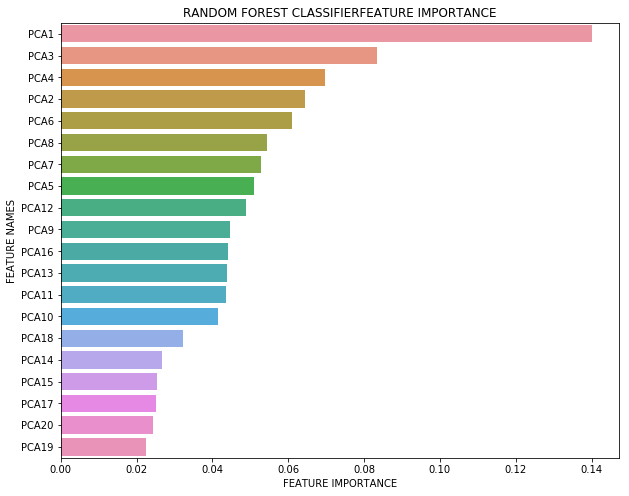

In [51]:
model_type = "RANDOM FOREST CLASSIFIER"
#Create arrays from feature importance and feature names
feature_importance = np.array(rfc.feature_importances_)
feature_names = np.array(principal_df.columns[:-1])

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title(model_type + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

### 5. Analyze Heart-rate

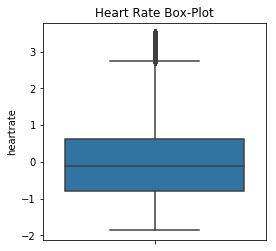

In [52]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate Box-Plot")
ax = sns.boxplot(y=raw_ds["heartrate"])

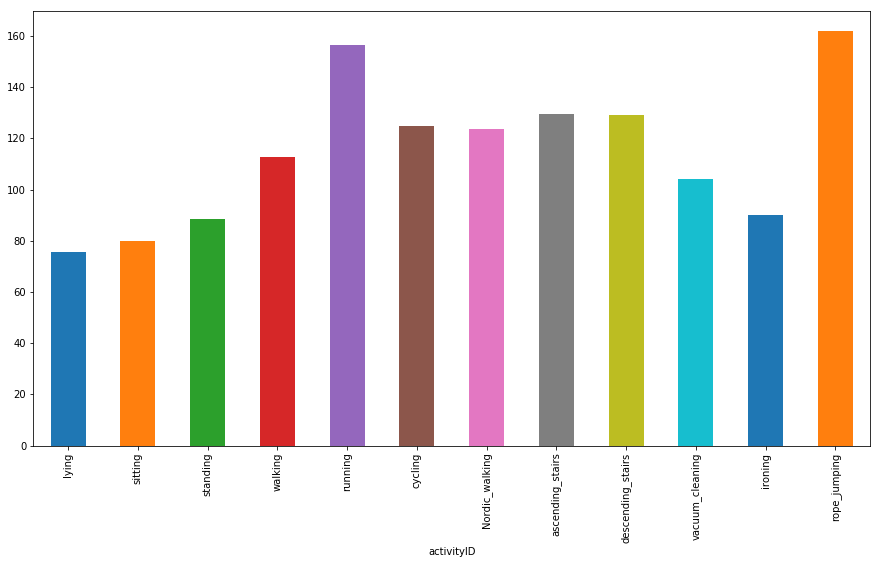

In [72]:
cmap = plt.cm.tab10
df_hr_act = df['heartrate'].groupby(df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
plt.figure(figsize=(15,8))
df_hr_act.plot(kind='bar', color=cmap(np.arange(len(df_hr_act)) % cmap.N))